# Generating prior frequency distribution file with different time offset

In [4]:
import os
import sys
sys.path.append("C:\\Users\\Maxcell-HomePC\\QishiQR\\")
from Utils.lm import *

# train model and generate new with varying frequencies
lm_model = LM_model(m=3, n=11, data_root_dir=r'../Data', output=r'../Output')
# t = ['1601', '1602'] # for testing
# ag_strategy_1701 = lm_model.LM_set(commodity='ag', exp_list=t, flg='train', freq=5, interval=1)

zn_contracts = ['1601', '1602', '1603', '1604', '1605', '1606', '1607', '1608', '1609', '1610', '1611', '1612', '1701', '1702', '1703', '1704', '1705', '1706', '1707', '1708', '1709', '1710', '1711', '1712']
zn_strategy = lm_model.LM_set(commodity='zn', exp_list=zn_contracts, flg='train', freq=5, interval=1)
zn_strategy.to_csv(r'../Strategy/zn_5min_strategy_t.csv', index=False)


0min
============zn train============
----------Running:1601----------
total lines: 905, with 0 lines selected as major contract
----------Running:1602----------
total lines: 2972, with 0 lines selected as major contract
----------Running:1603----------
select data of 1603 start from 2016-1-1 09:00:00.0 to 2016-1-31 23:59:59.0
total lines: 6140, with 3636 lines selected as major contract
----------Running:1604----------
select data of 1604 start from 2016-2-1 09:00:00.0 to 2016-2-29 23:59:59.0
total lines: 7625, with 2051 lines selected as major contract
----------Running:1605----------
select data of 1605 start from 2016-3-1 09:00:00.0 to 2016-3-31 23:59:59.0
total lines: 10649, with 3347 lines selected as major contract
----------Running:1606----------
select data of 1606 start from 2016-4-1 09:00:00.0 to 2016-4-30 23:59:59.0
total lines: 12521, with 2975 lines selected as major contract
----------Running:1607----------
select data of 1607 start from 2016-5-1 09:00:00.0 to 2016-5-31 

----------Running:1604----------
select data of 1604 start from 2016-2-1 09:00:00.0 to 2016-2-29 23:59:59.0
total lines: 7423, with 2004 lines selected as major contract
----------Running:1605----------
select data of 1605 start from 2016-3-1 09:00:00.0 to 2016-3-31 23:59:59.0
total lines: 10387, with 3279 lines selected as major contract
----------Running:1606----------
select data of 1606 start from 2016-4-1 09:00:00.0 to 2016-4-30 23:59:59.0
total lines: 12201, with 2916 lines selected as major contract
----------Running:1607----------
select data of 1607 start from 2016-5-1 09:00:00.0 to 2016-5-31 23:59:59.0
total lines: 12120, with 2517 lines selected as major contract
----------Running:1608----------
select data of 1608 start from 2016-6-1 09:00:00.0 to 2016-6-30 23:59:59.0
total lines: 13272, with 2376 lines selected as major contract
----------Running:1609----------
select data of 1609 start from 2016-7-1 09:00:00.0 to 2016-7-31 23:59:59.0
total lines: 12120, with 2529 lines se

----------Running:1606----------
select data of 1606 start from 2016-4-1 09:00:00.0 to 2016-4-30 23:59:59.0
total lines: 12201, with 2916 lines selected as major contract
----------Running:1607----------
select data of 1607 start from 2016-5-1 09:00:00.0 to 2016-5-31 23:59:59.0
total lines: 12120, with 2517 lines selected as major contract
----------Running:1608----------
select data of 1608 start from 2016-6-1 09:00:00.0 to 2016-6-30 23:59:59.0
total lines: 13272, with 2376 lines selected as major contract
----------Running:1609----------
select data of 1609 start from 2016-7-1 09:00:00.0 to 2016-7-31 23:59:59.0
total lines: 12120, with 2529 lines selected as major contract
----------Running:1610----------
select data of 1610 start from 2016-8-1 09:00:00.0 to 2016-8-31 23:59:59.0
total lines: 10968, with 2703 lines selected as major contract
----------Running:1611----------
select data of 1611 start from 2016-9-1 09:00:00.0 to 2016-9-30 23:59:59.0
total lines: 12696, with 2340 lines s

# Backtesting with IN SAMPLE data

In [1]:
import os
import sys
sys.path.append("C:\\Users\\Maxcell-HomePC\\QishiQR\\")
import pandas as pd
import numpy as np
from Backtesting.Vectorized.lm_validation import LmValidation
import numpy as np

zn_strategy = pd.read_csv(r'../Strategy/zn_5min_strategy_all.csv')
slm = zn_strategy[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
max_prior = np.array(slm.loc[:, '0':'2'].max(axis=1))
tot_prior = np.array(slm.loc[:,'total'])
sig_prior = np.array(slm.loc[:,'signal'])
prior = np.array(slm.loc[:,'prior'])
prior_weight = [np.sqrt(2**(len(i)-1)) for i in prior]
max_ratio_over = max_prior/tot_prior-0.33333
prior_ratio_noise = np.sqrt((max_prior+tot_prior)/(max_prior*tot_prior))
cL = max_ratio_over/ prior_ratio_noise
mask = np.where(sig_prior=='0', 0, 1)
cL = cL*mask/np.nanmax(cL*mask)*prior_weight
slm['CL'] = cL
slm = slm.fillna(0)
lm_validation = LmValidation(slm, symbol = 'zn*', data_dir = r'../Output', 
                             valid_dir = r'../Validation_IS', max_order = 8, tca = 'Fixed', opt = 'CL', data_mode = 'Insample')
lm_validation.run()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Maxcell-HomePC\QishiQR\Backtesting\Vectorized\backtest.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.result['return'][0] = 0.0
C:\Users\Maxcell-HomePC\QishiQR\Backtesting\Vectorized\backtest.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.result['signal_bar'][0] = 0
C:\Users\Maxcell-HomePC\QishiQR\Backtesting\Vectorized\backtest.py:19: SettingWithCopyWarning: 
A value is try

# Backtesting with OUT SAMPLE data

In [2]:
import os
import sys
sys.path.append("C:\\Users\\Maxcell-HomePC\\QishiQR\\")
import pandas as pd
import numpy as np
from Backtesting.Vectorized.lm_validation import LmValidation
import numpy as np

zn_strategy = pd.read_csv(r'../Strategy/zn_5min_strategy_all.csv')
slm = zn_strategy[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
prior = np.array(slm.loc[:,'prior'])
prior_weight = [np.sqrt(2**(len(i)-1)) for i in prior]
max_ratio_over = max_prior/tot_prior-0.33333
prior_ratio_noise = np.sqrt((max_prior+tot_prior)/(max_prior*tot_prior))
cL = max_ratio_over/ prior_ratio_noise
mask = np.where(sig_prior=='0', 0, 1)
cL = cL*mask/np.nanmax(cL*mask)*prior_weight
slm['CL'] = cL
slm = slm.fillna(0)
lm_validation = LmValidation(slm, symbol = 'zn*', data_dir = r'../Output', valid_dir = r'../Validation_OS', max_order = 8, tca = 'Fixed', opt = 'CL', data_mode = 'Outsample')
lm_validation.run()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
C:\Users\Maxcell-HomePC\QishiQR\Backtesting\Vectorized\backtest.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.result['return'][0] = 0.0
C:\Users\Maxcell-HomePC\QishiQR\Backtesting\Vectorized\backtest.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.result['signal_bar'][0] = 0


In [16]:
import os
import sys
sys.path.append("C:\\Users\\maxwell\\QishiQR\\")
import pandas as pd
import numpy as np
from Backtesting.Vectorized.lm_validation import LmValidation
import numpy as np

zn_strategy = pd.read_csv(r'../Strategy/zn_5min_strategy_all.csv')
slm = zn_strategy[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
max_prior = np.array(slm.loc[:, '0':'2'].max(axis=1))
tot_prior = np.array(slm.loc[:,'total'])
sig_prior = np.array(slm.loc[:,'signal'])
prior = np.array(slm.loc[:,'prior'])
prior_weight = [np.sqrt(2**(len(i)-1)) for i in prior]
max_ratio_over = max_prior/tot_prior-0.33333
prior_ratio_noise = np.sqrt((max_prior+tot_prior)/(max_prior*tot_prior))
cL = max_ratio_over/ prior_ratio_noise
mask = np.where(sig_prior=='0', 0, 1)
cL = cL*mask/np.nanmax(cL*mask)*prior_weight
slm['CL'] = cL
slm = slm.fillna(0)
print(slm.sort_values('CL'))


            prior       0       1       2   total signal        CL
0               p  515901  118818  122274  756993      0  0.000000
8147   p021110000      13       4       3      20      0  0.000000
8148   p021110001       0       0       0       0      0  0.000000
8149   p021110002       6       1       1       8      0  0.000000
8150    p02111001       4       4       3      11      0  0.000000
20709  p200221020       1       1       0       2      0  0.000000
8152   p021110011       2       1       1       4      0  0.000000
8154    p02111002       6       2       4      12      0  0.000000
8156   p021110021       1       1       0       2      0  0.000000
20704   p20022101       5       4       2      11      0  0.000000
20702  p200221001       3       3       2       8      0  0.000000
20701  p200221000       8       1       1      10      0  0.000000
8162   p021110102       3       1       2       6      0  0.000000
20700   p20022100      10       8       1      19      0  0.00

C:\Users\maxwell\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
C:\Users\maxwell\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


# Performance comparison 

# 1. Major contract and a dedicated contract comparision

## Contract 1701, InSample, without trading cost, no sizing optimization

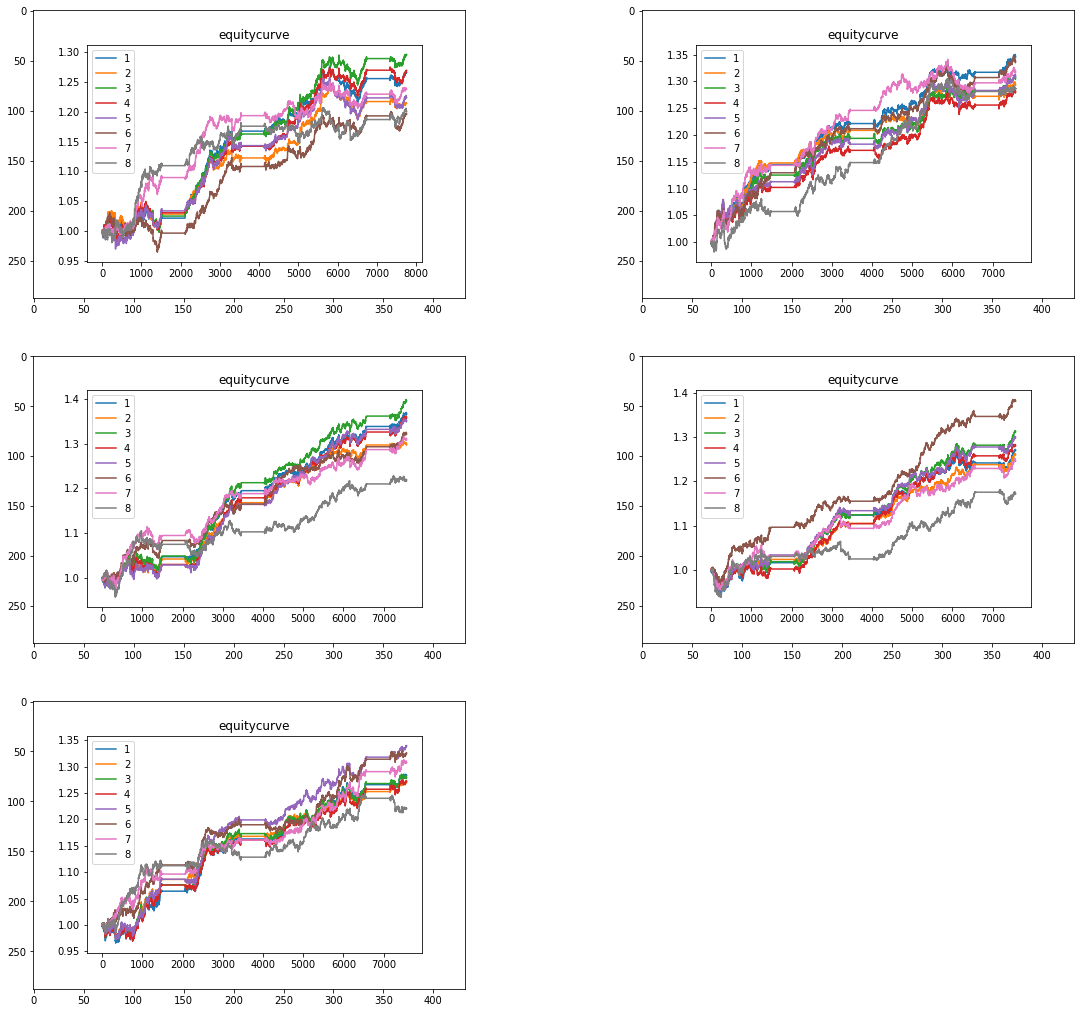

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img0=mpimg.imread('../Validation_IS_Maj/performance_zn_5min_1701_0.0.png')
img1=mpimg.imread('../Validation_IS_Maj/performance_zn_5min_1701_1.0.png')
img2=mpimg.imread('../Validation_IS_Maj/performance_zn_5min_1701_2.0.png')
img3=mpimg.imread('../Validation_IS_Maj/performance_zn_5min_1701_3.0.png')
img4=mpimg.imread('../Validation_IS_Maj/performance_zn_5min_1701_4.0.png')
fig = plt.figure(figsize=(20,18))
plt.subplot(321)
plt.imshow(img0)
plt.subplot(322)
plt.imshow(img1)
plt.subplot(323)
plt.imshow(img2)
plt.subplot(324)
plt.imshow(img3)
plt.subplot(325)
plt.imshow(img4)
plt.show()

In [18]:
import pandas as pd
perform1 = pd.read_csv(r'../Validation_IS_Maj/performance_zn_5min_1701_0.0.csv')
perform2 = pd.read_csv(r'../Validation_IS_Maj/performance_zn_5min_1701_1.0.csv')
perform3 = pd.read_csv(r'../Validation_IS_Maj/performance_zn_5min_1701_2.0.csv')
perform4 = pd.read_csv(r'../Validation_IS_Maj/performance_zn_5min_1701_3.0.csv')
perform5 = pd.read_csv(r'../Validation_IS_Maj/performance_zn_5min_1701_4.0.csv')
display(perform1)
display(perform2)
display(perform3)
display(perform4)
display(perform5)

,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.153002,0.003504,-0.001444,0.000873,0.000067,-0.015588,0.007971,-0.048108,0.604039,5.725296,3965,1.266299,0.446910
1,2,0.150726,0.002821,-0.001446,0.000892,0.000065,-0.015588,0.007971,-0.046615,0.616649,4.679115,3312,1.214400,0.447162
2,3,0.154041,0.003891,-0.001517,0.000860,0.000096,-0.015588,0.009455,-0.046783,0.566750,6.315091,3068,1.295727,0.602673
3,4,0.157274,0.003546,-0.001541,0.000865,0.000090,-0.015588,0.009455,-0.045076,0.561630,5.637351,2988,1.269529,0.577979
4,5,0.159210,0.002950,-0.001511,0.000865,0.000071,-0.015588,0.007971,-0.056332,0.572442,4.631973,3137,1.224186,0.551482
5,6,0.152970,0.002584,-0.001515,0.000928,0.000069,-0.015588,0.009455,-0.064216,0.612525,4.222940,2835,1.196378,0.562963
6,7,0.164865,0.003131,-0.001404,0.000972,0.000080,-0.015588,0.012255,-0.035804,0.691917,4.747558,2978,1.237943,0.533580
7,8,0.168965,0.002643,-0.001382,0.001002,0.000066,-0.018718,0.012255,-0.045167,0.724561,3.911063,3033,1.200893,0.514342


,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.145197,0.004566,-0.001504,0.000893,0.000091,-0.015337,0.006557,-0.027901,0.593409,7.861382,3802,1.347001,0.476328
1,2,0.148784,0.003883,-0.001478,0.000914,0.000091,-0.015337,0.006772,-0.030056,0.618252,6.523816,3231,1.295074,0.477871
2,3,0.144208,0.004039,-0.001606,0.000881,0.000102,-0.015337,0.006557,-0.035096,0.548407,7.001325,2995,1.306933,0.618030
3,4,0.142189,0.003703,-0.001630,0.000894,0.000098,-0.015337,0.006557,-0.035138,0.548674,6.511557,2878,1.281465,0.604587
4,5,0.162508,0.004089,-0.001601,0.000898,0.000101,-0.015337,0.006557,-0.040666,0.561036,6.290468,3074,1.310764,0.586858
5,6,0.155125,0.004448,-0.001551,0.000983,0.000122,-0.014765,0.009983,-0.039505,0.633643,7.169179,2762,1.338084,0.585083
6,7,0.171219,0.004193,-0.001477,0.000991,0.000110,-0.014765,0.009983,-0.046769,0.671147,6.122273,2884,1.318667,0.570735
7,8,0.165042,0.003773,-0.001383,0.001052,0.000097,-0.014479,0.008589,-0.053163,0.760665,5.714792,2946,1.286728,0.529871


,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.138904,0.004832,-0.001419,0.000885,0.000096,-0.015055,0.010284,-0.037193,0.623700,8.697443,3823,1.367267,0.472142
1,2,0.125864,0.003945,-0.001429,0.000895,0.000092,-0.015055,0.010284,-0.037537,0.626200,7.836717,3263,1.299852,0.473184
2,3,0.145444,0.005212,-0.001513,0.000880,0.000131,-0.015055,0.010284,-0.037134,0.581422,8.958536,3027,1.396101,0.619756
3,4,0.133539,0.004723,-0.001531,0.000890,0.000122,-0.014483,0.010284,-0.041971,0.581276,8.841365,2946,1.358924,0.594705
4,5,0.151170,0.004623,-0.001507,0.000875,0.000113,-0.015055,0.010284,-0.036106,0.580540,7.644775,3097,1.351321,0.584114
5,6,0.153378,0.004249,-0.001526,0.000967,0.000118,-0.013625,0.010284,-0.039761,0.633314,6.925901,2739,1.322933,0.584885
6,7,0.152043,0.004082,-0.001432,0.000983,0.000108,-0.013625,0.011877,-0.045514,0.686554,6.711706,2876,1.310222,0.553894
7,8,0.158494,0.002885,-0.001385,0.001008,0.000073,-0.014483,0.011877,-0.059351,0.728055,4.550451,3009,1.219250,0.514124


,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.141063,0.003559,-0.001429,0.000871,0.000071,-0.013903,0.009080,-0.051784,0.609633,6.307977,3827,1.270506,0.457016
1,2,0.118945,0.003416,-0.001447,0.000898,0.000079,-0.012836,0.009080,-0.040153,0.620574,7.179920,3273,1.259621,0.458601
2,3,0.149039,0.004109,-0.001520,0.000868,0.000105,-0.019270,0.009080,-0.048891,0.570963,6.892233,2987,1.312273,0.610646
3,4,0.144504,0.003700,-0.001530,0.000881,0.000097,-0.019270,0.009080,-0.047336,0.575975,6.400684,2908,1.281176,0.580812
4,5,0.140199,0.003939,-0.001500,0.000881,0.000098,-0.019270,0.009080,-0.048604,0.586933,7.023671,3061,1.299353,0.571382
5,6,0.139163,0.005016,-0.001491,0.000979,0.000138,-0.015328,0.011635,-0.035144,0.656392,9.010557,2769,1.381196,0.585771
6,7,0.149942,0.003236,-0.001444,0.000971,0.000086,-0.015328,0.013156,-0.047621,0.672581,5.395076,2851,1.245920,0.554542
7,8,0.157147,0.002260,-0.001342,0.001008,0.000059,-0.013817,0.011635,-0.063224,0.751290,3.594599,2893,1.171724,0.517110


,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.153890,0.003724,-0.001439,0.000834,0.000074,-0.014790,0.010017,-0.034446,0.579896,6.050162,3815,1.283043,0.469987
1,2,0.131789,0.003542,-0.001461,0.000858,0.000083,-0.014790,0.010017,-0.031218,0.587370,6.719218,3257,1.269198,0.475284
2,3,0.160552,0.003675,-0.001515,0.000828,0.000093,-0.018703,0.010017,-0.030286,0.546632,5.723194,2999,1.279336,0.613871
3,4,0.151669,0.003581,-0.001514,0.000840,0.000094,-0.018703,0.010017,-0.032784,0.554700,5.903320,2909,1.272186,0.592300
4,5,0.159588,0.004466,-0.001504,0.000841,0.000108,-0.017845,0.010017,-0.031147,0.559341,6.995607,3133,1.339389,0.576763
5,6,0.149354,0.004285,-0.001491,0.000921,0.000119,-0.018983,0.010017,-0.024055,0.617456,7.172841,2742,1.325673,0.589716
6,7,0.137725,0.004049,-0.001385,0.000943,0.000107,-0.013183,0.010847,-0.025443,0.680399,7.350416,2884,1.307751,0.558599
7,8,0.158080,0.002901,-0.001338,0.000985,0.000075,-0.014799,0.010218,-0.034431,0.735882,4.588489,2943,1.220506,0.517499


## Major contract, InSample, without trading cost, no sizing optimization

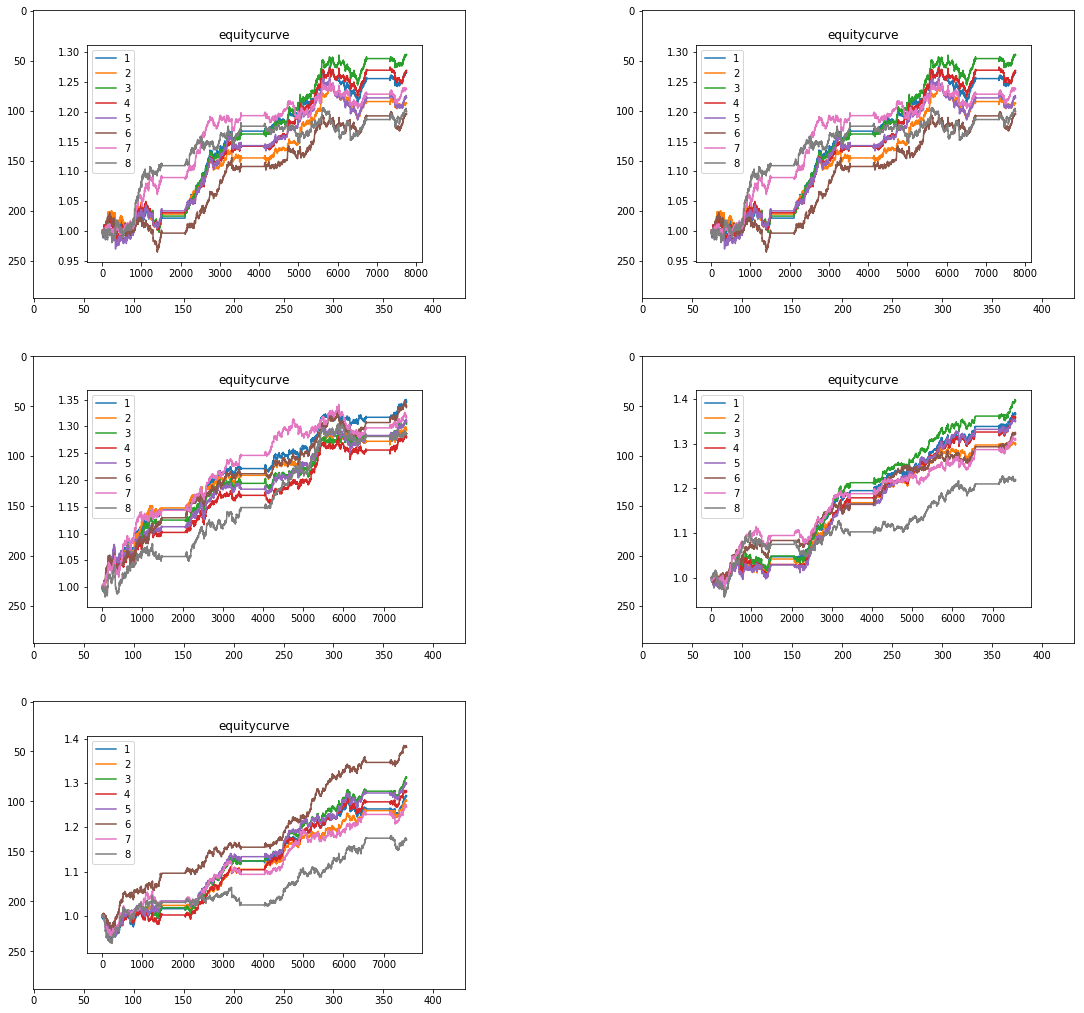

In [6]:
img1=mpimg.imread('../Validation_IS_Maj/performance_zn_5min_0.0part.png')
img2=mpimg.imread('../Validation_IS_Maj/performance_zn_5min_1.0part.png')
img3=mpimg.imread('../Validation_IS_Maj/performance_zn_5min_2.0part.png')
img4=mpimg.imread('../Validation_IS_Maj/performance_zn_5min_3.0part.png')
img5=mpimg.imread('../Validation_IS_Maj/performance_zn_5min_4.0part.png')
fig = plt.figure(figsize=(20,18))
plt.subplot(321)
plt.imshow(img0)
plt.subplot(322)
plt.imshow(img1)
plt.subplot(323)
plt.imshow(img2)
plt.subplot(324)
plt.imshow(img3)
plt.subplot(325)
plt.imshow(img4)
plt.show()

In [20]:
import pandas as pd
perform1 = pd.read_csv(r'../Validation_IS_Maj/performance_zn_5min_0.0part.csv')
perform2 = pd.read_csv(r'../Validation_IS_Maj/performance_zn_5min_1.0part.csv')
perform3 = pd.read_csv(r'../Validation_IS_Maj/performance_zn_5min_2.0part.csv')
perform4 = pd.read_csv(r'../Validation_IS_Maj/performance_zn_5min_3.0part.csv')
perform5 = pd.read_csv(r'../Validation_IS_Maj/performance_zn_5min_4.0part.csv')
display(perform1)
display(perform2)
display(perform3)
display(perform4)
display(perform5)

,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.153002,0.003504,-0.001444,0.000873,0.000067,-0.015588,0.007971,-0.048108,0.604039,5.725296,3965,1.266299,0.446910
1,2,0.150726,0.002821,-0.001446,0.000892,0.000065,-0.015588,0.007971,-0.046615,0.616649,4.679115,3312,1.214400,0.447162
2,3,0.154041,0.003891,-0.001517,0.000860,0.000096,-0.015588,0.009455,-0.046783,0.566750,6.315091,3068,1.295727,0.602673
3,4,0.157274,0.003546,-0.001541,0.000865,0.000090,-0.015588,0.009455,-0.045076,0.561630,5.637351,2988,1.269529,0.577979
4,5,0.159210,0.002950,-0.001511,0.000865,0.000071,-0.015588,0.007971,-0.056332,0.572442,4.631973,3137,1.224186,0.551482
5,6,0.152970,0.002584,-0.001515,0.000928,0.000069,-0.015588,0.009455,-0.064216,0.612525,4.222940,2835,1.196378,0.562963
6,7,0.164865,0.003131,-0.001404,0.000972,0.000080,-0.015588,0.012255,-0.035804,0.691917,4.747558,2978,1.237943,0.533580
7,8,0.168965,0.002643,-0.001382,0.001002,0.000066,-0.018718,0.012255,-0.045167,0.724561,3.911063,3033,1.200893,0.514342


,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.145197,0.004566,-0.001504,0.000893,0.000091,-0.015337,0.006557,-0.027901,0.593409,7.861382,3802,1.347001,0.476328
1,2,0.148784,0.003883,-0.001478,0.000914,0.000091,-0.015337,0.006772,-0.030056,0.618252,6.523816,3231,1.295074,0.477871
2,3,0.144208,0.004039,-0.001606,0.000881,0.000102,-0.015337,0.006557,-0.035096,0.548407,7.001325,2995,1.306933,0.618030
3,4,0.142189,0.003703,-0.001630,0.000894,0.000098,-0.015337,0.006557,-0.035138,0.548674,6.511557,2878,1.281465,0.604587
4,5,0.162508,0.004089,-0.001601,0.000898,0.000101,-0.015337,0.006557,-0.040666,0.561036,6.290468,3074,1.310764,0.586858
5,6,0.155125,0.004448,-0.001551,0.000983,0.000122,-0.014765,0.009983,-0.039505,0.633643,7.169179,2762,1.338084,0.585083
6,7,0.171219,0.004193,-0.001477,0.000991,0.000110,-0.014765,0.009983,-0.046769,0.671147,6.122273,2884,1.318667,0.570735
7,8,0.165042,0.003773,-0.001383,0.001052,0.000097,-0.014479,0.008589,-0.053163,0.760665,5.714792,2946,1.286728,0.529871


,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.138904,0.004832,-0.001419,0.000885,0.000096,-0.015055,0.010284,-0.037193,0.623700,8.697443,3823,1.367267,0.472142
1,2,0.125864,0.003945,-0.001429,0.000895,0.000092,-0.015055,0.010284,-0.037537,0.626200,7.836717,3263,1.299852,0.473184
2,3,0.145444,0.005212,-0.001513,0.000880,0.000131,-0.015055,0.010284,-0.037134,0.581422,8.958536,3027,1.396101,0.619756
3,4,0.133539,0.004723,-0.001531,0.000890,0.000122,-0.014483,0.010284,-0.041971,0.581276,8.841365,2946,1.358924,0.594705
4,5,0.151170,0.004623,-0.001507,0.000875,0.000113,-0.015055,0.010284,-0.036106,0.580540,7.644775,3097,1.351321,0.584114
5,6,0.153378,0.004249,-0.001526,0.000967,0.000118,-0.013625,0.010284,-0.039761,0.633314,6.925901,2739,1.322933,0.584885
6,7,0.152043,0.004082,-0.001432,0.000983,0.000108,-0.013625,0.011877,-0.045514,0.686554,6.711706,2876,1.310222,0.553894
7,8,0.158494,0.002885,-0.001385,0.001008,0.000073,-0.014483,0.011877,-0.059351,0.728055,4.550451,3009,1.219250,0.514124


,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.141063,0.003559,-0.001429,0.000871,0.000071,-0.013903,0.009080,-0.051784,0.609633,6.307977,3827,1.270506,0.457016
1,2,0.118945,0.003416,-0.001447,0.000898,0.000079,-0.012836,0.009080,-0.040153,0.620574,7.179920,3273,1.259621,0.458601
2,3,0.149039,0.004109,-0.001520,0.000868,0.000105,-0.019270,0.009080,-0.048891,0.570963,6.892233,2987,1.312273,0.610646
3,4,0.144504,0.003700,-0.001530,0.000881,0.000097,-0.019270,0.009080,-0.047336,0.575975,6.400684,2908,1.281176,0.580812
4,5,0.140199,0.003939,-0.001500,0.000881,0.000098,-0.019270,0.009080,-0.048604,0.586933,7.023671,3061,1.299353,0.571382
5,6,0.139163,0.005016,-0.001491,0.000979,0.000138,-0.015328,0.011635,-0.035144,0.656392,9.010557,2769,1.381196,0.585771
6,7,0.149942,0.003236,-0.001444,0.000971,0.000086,-0.015328,0.013156,-0.047621,0.672581,5.395076,2851,1.245920,0.554542
7,8,0.157147,0.002260,-0.001342,0.001008,0.000059,-0.013817,0.011635,-0.063224,0.751290,3.594599,2893,1.171724,0.517110


,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.153890,0.003724,-0.001439,0.000834,0.000074,-0.014790,0.010017,-0.034446,0.579896,6.050162,3815,1.283043,0.469987
1,2,0.131789,0.003542,-0.001461,0.000858,0.000083,-0.014790,0.010017,-0.031218,0.587370,6.719218,3257,1.269198,0.475284
2,3,0.160552,0.003675,-0.001515,0.000828,0.000093,-0.018703,0.010017,-0.030286,0.546632,5.723194,2999,1.279336,0.613871
3,4,0.151669,0.003581,-0.001514,0.000840,0.000094,-0.018703,0.010017,-0.032784,0.554700,5.903320,2909,1.272186,0.592300
4,5,0.159588,0.004466,-0.001504,0.000841,0.000108,-0.017845,0.010017,-0.031147,0.559341,6.995607,3133,1.339389,0.576763
5,6,0.149354,0.004285,-0.001491,0.000921,0.000119,-0.018983,0.010017,-0.024055,0.617456,7.172841,2742,1.325673,0.589716
6,7,0.137725,0.004049,-0.001385,0.000943,0.000107,-0.013183,0.010847,-0.025443,0.680399,7.350416,2884,1.307751,0.558599
7,8,0.158080,0.002901,-0.001338,0.000985,0.000075,-0.014799,0.010218,-0.034431,0.735882,4.588489,2943,1.220506,0.517499


## Contract 1701, OutSample, without trading cost, no sizing optimization

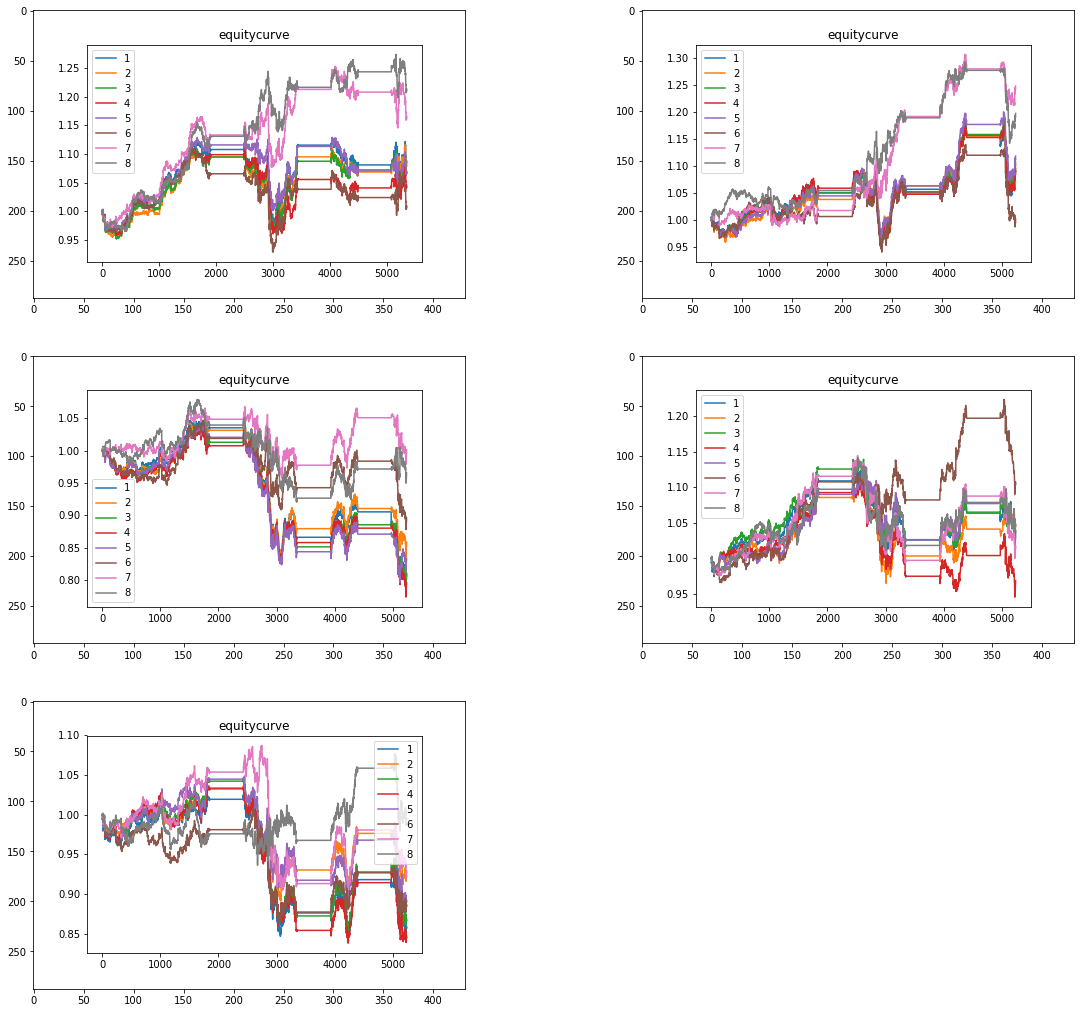

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img0=mpimg.imread('../Validation_OS_Maj/performance_zn_5min_1701_0.0.png')
img1=mpimg.imread('../Validation_OS_Maj/performance_zn_5min_1701_1.0.png')
img2=mpimg.imread('../Validation_OS_Maj/performance_zn_5min_1701_2.0.png')
img3=mpimg.imread('../Validation_OS_Maj/performance_zn_5min_1701_3.0.png')
img4=mpimg.imread('../Validation_OS_Maj/performance_zn_5min_1701_4.0.png')
fig = plt.figure(figsize=(20,18))
plt.subplot(321)
plt.imshow(img0)
plt.subplot(322)
plt.imshow(img1)
plt.subplot(323)
plt.imshow(img2)
plt.subplot(324)
plt.imshow(img3)
plt.subplot(325)
plt.imshow(img4)
plt.show()

In [21]:
import pandas as pd
perform1 = pd.read_csv(r'../Validation_OS_Maj/performance_zn_5min_1701_0.0.csv')
perform2 = pd.read_csv(r'../Validation_OS_Maj/performance_zn_5min_1701_1.0.csv')
perform3 = pd.read_csv(r'../Validation_OS_Maj/performance_zn_5min_1701_2.0.csv')
perform4 = pd.read_csv(r'../Validation_OS_Maj/performance_zn_5min_1701_3.0.csv')
perform5 = pd.read_csv(r'../Validation_OS_Maj/performance_zn_5min_1701_4.0.csv')
display(perform1)
display(perform2)
display(perform3)
display(perform4)
display(perform5)

,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.311081,0.001966,-0.002551,0.001449,0.000040,-0.035562,0.019105,-0.130015,0.567972,1.579980,2222,1.088470,0.487849
1,2,0.289019,0.001842,-0.002606,0.001484,0.000042,-0.035562,0.019105,-0.131466,0.569456,1.593003,1956,1.082873,0.495399
2,3,0.311743,0.001547,-0.002763,0.001469,0.000039,-0.035562,0.019105,-0.127306,0.531576,1.240740,1798,1.069623,0.611235
3,4,0.291917,0.001014,-0.002842,0.001472,0.000026,-0.035562,0.019105,-0.135464,0.518043,0.868410,1754,1.045631,0.602052
4,5,0.294243,0.001569,-0.002797,0.001494,0.000039,-0.035562,0.019105,-0.113338,0.534313,1.333264,1834,1.070615,0.583969
5,6,0.298130,0.000223,-0.002720,0.001602,0.000006,-0.035562,0.022155,-0.163674,0.588789,0.187301,1643,1.010051,0.570298
6,7,0.329419,0.003683,-0.002727,0.001649,0.000094,-0.035562,0.022155,-0.093594,0.604652,2.795110,1761,1.165737,0.582056
7,8,0.322117,0.004752,-0.002427,0.001746,0.000115,-0.032522,0.022155,-0.084819,0.719266,3.687789,1852,1.213822,0.538337


,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.412578,0.002099,-0.002889,0.001445,4.402619e-05,-0.034596,0.017257,-0.129211,0.500161,1.271628,2145,1.094436,0.534732
1,2,0.381268,0.002142,-0.002946,0.001443,4.964542e-05,-0.034596,0.017257,-0.128961,0.489791,1.404837,1942,1.096411,0.543254
2,3,0.422423,0.002371,-0.002985,0.001420,5.955117e-05,-0.034596,0.017257,-0.129942,0.475653,1.403488,1792,1.106716,0.659040
3,4,0.417239,0.002002,-0.003045,0.001429,5.117708e-05,-0.034596,0.017257,-0.136018,0.469397,1.199309,1760,1.090072,0.648295
4,5,0.421160,0.002623,-0.002981,0.001421,6.529515e-05,-0.034596,0.017257,-0.122952,0.476755,1.557256,1808,1.118054,0.639934
5,6,0.403659,0.000023,-0.003016,0.001510,6.380920e-07,-0.034596,0.012019,-0.134625,0.500834,0.014367,1636,1.001044,0.620416
6,7,0.298970,0.005517,-0.002821,0.001702,1.515774e-04,-0.030563,0.022965,-0.077755,0.603461,4.613687,1638,1.248284,0.601954
7,8,0.407170,0.004384,-0.002602,0.001768,1.155815e-04,-0.030563,0.017257,-0.116490,0.679701,2.691991,1707,1.197298,0.561804


,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.335427,-0.004255,-0.002816,0.001351,-9.001791e-05,-0.034270,0.012487,-0.255245,0.479589,-3.171221,2127,0.808532,0.495063
1,2,0.305585,-0.003146,-0.002813,0.001414,-7.505740e-05,-0.034270,0.012487,-0.206651,0.502824,-2.573541,1886,0.858442,0.501591
2,3,0.312739,-0.004222,-0.002902,0.001342,-1.086216e-04,-0.034270,0.012487,-0.245523,0.462611,-3.374829,1749,0.810021,0.611206
3,4,0.306991,-0.004536,-0.002952,0.001355,-1.203448e-04,-0.034270,0.012487,-0.253333,0.459008,-3.693650,1696,0.795895,0.606132
4,5,0.305831,-0.003694,-0.002900,0.001367,-9.465695e-05,-0.034270,0.012487,-0.235301,0.471254,-3.019419,1756,0.833782,0.590547
5,6,0.315354,-0.002318,-0.002897,0.001540,-6.450453e-05,-0.032308,0.013408,-0.161544,0.531478,-1.837508,1617,0.895696,0.579468
6,7,0.284456,0.000031,-0.002661,0.001609,8.180634e-07,-0.034270,0.014456,-0.102682,0.604730,0.026890,1683,1.001377,0.567439
7,8,0.281398,-0.000759,-0.002649,0.001669,-2.060399e-05,-0.032308,0.014058,-0.147005,0.630290,-0.674031,1657,0.965859,0.540133


,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.253768,0.000865,-0.002654,0.001402,0.000018,-0.032124,0.016170,-0.104055,0.528086,0.852390,2149,1.038936,0.508143
1,2,0.243627,0.001042,-0.002664,0.001433,0.000024,-0.032124,0.013120,-0.127576,0.537818,1.069066,1923,1.046882,0.510140
2,3,0.275265,0.000845,-0.002761,0.001380,0.000021,-0.032415,0.013844,-0.108979,0.499792,0.767156,1796,1.038011,0.628062
3,4,0.286602,-0.000704,-0.002806,0.001385,-0.000018,-0.032415,0.013844,-0.146141,0.493595,-0.614493,1746,0.968299,0.607675
4,5,0.256917,0.000693,-0.002766,0.001390,0.000017,-0.032415,0.016170,-0.105571,0.502559,0.674778,1796,1.031205,0.605234
5,6,0.348277,0.002385,-0.002758,0.001577,0.000064,-0.032415,0.018605,-0.109181,0.571764,1.711671,1667,1.107304,0.592681
6,7,0.331798,0.000387,-0.002778,0.001531,0.000010,-0.032415,0.015354,-0.131854,0.551198,0.291231,1720,1.017393,0.587791
7,8,0.259000,0.001077,-0.002604,0.001679,0.000028,-0.031143,0.016149,-0.114736,0.644958,1.039610,1712,1.048467,0.548481


,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.284159,-0.003130,-0.002594,0.001338,-0.000068,-0.027684,0.015926,-0.177483,0.516032,-2.753320,2084,0.859171,0.500000
1,2,0.263106,-0.001688,-0.002604,0.001379,-0.000040,-0.027684,0.015926,-0.140528,0.529610,-1.603676,1887,0.924051,0.507154
2,3,0.311763,-0.002922,-0.002764,0.001352,-0.000076,-0.027684,0.015926,-0.186739,0.489142,-2.343475,1741,0.868491,0.612292
3,4,0.313386,-0.003400,-0.002811,0.001362,-0.000091,-0.027684,0.015926,-0.190700,0.484366,-2.712628,1686,0.846982,0.604389
4,5,0.290853,-0.002391,-0.002769,0.001373,-0.000061,-0.027684,0.015926,-0.156552,0.495842,-2.055291,1766,0.892398,0.593998
5,6,0.290926,-0.002514,-0.002702,0.001514,-0.000070,-0.027684,0.017566,-0.142680,0.560408,-2.160449,1625,0.886865,0.566769
6,7,0.354360,-0.001573,-0.002597,0.001553,-0.000041,-0.027684,0.017520,-0.168430,0.598090,-1.109479,1717,0.929232,0.565521
7,8,0.281695,-0.000086,-0.002399,0.001685,-0.000002,-0.027684,0.021360,-0.090722,0.702305,-0.075901,1706,0.996151,0.532825


## Major contract, OutSample, without trading cost, no sizing optimization

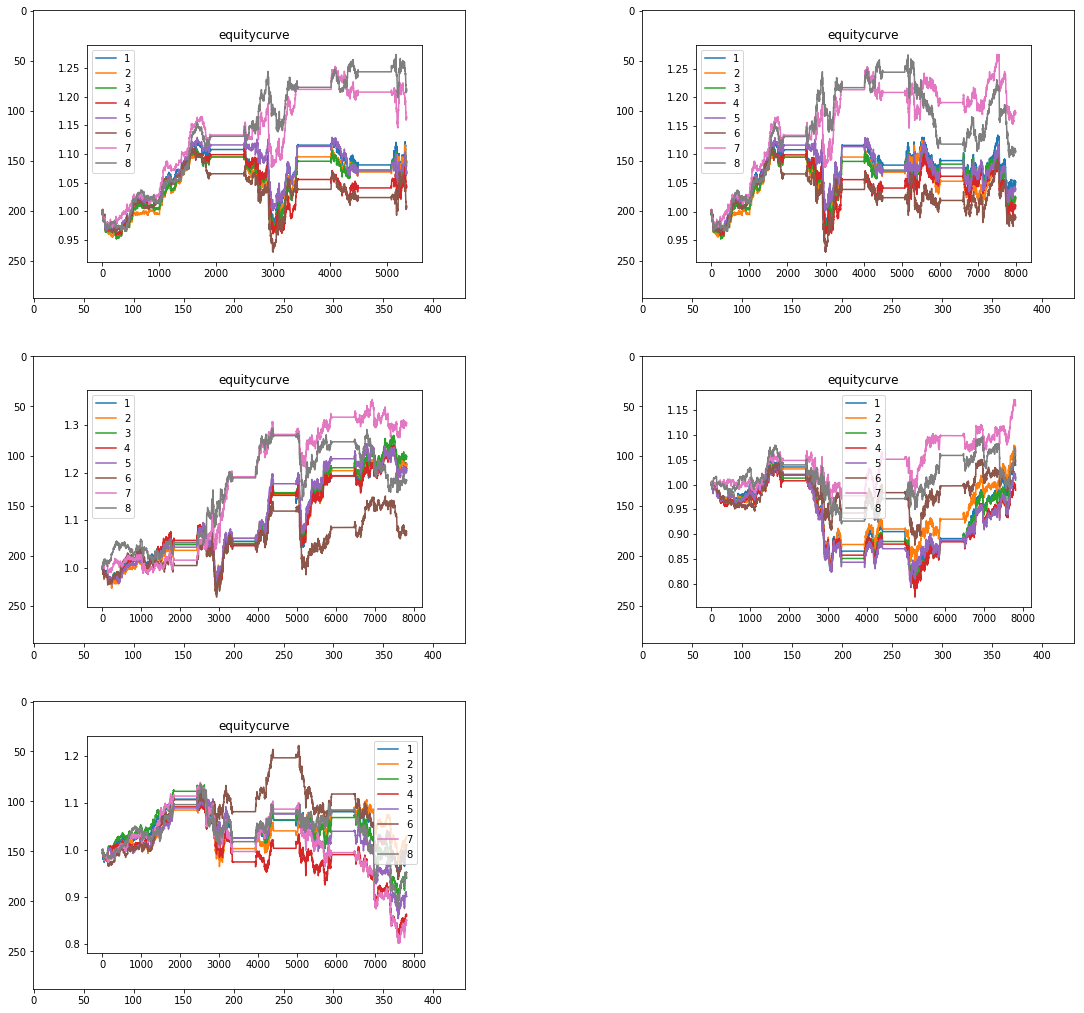

In [9]:
img1=mpimg.imread('../Validation_OS_Maj/performance_zn_5min_0.0part.png')
img2=mpimg.imread('../Validation_OS_Maj/performance_zn_5min_1.0part.png')
img3=mpimg.imread('../Validation_OS_Maj/performance_zn_5min_2.0part.png')
img4=mpimg.imread('../Validation_OS_Maj/performance_zn_5min_3.0part.png')
img5=mpimg.imread('../Validation_OS_Maj/performance_zn_5min_4.0part.png')
fig = plt.figure(figsize=(20,18))
plt.subplot(321)
plt.imshow(img0)
plt.subplot(322)
plt.imshow(img1)
plt.subplot(323)
plt.imshow(img2)
plt.subplot(324)
plt.imshow(img3)
plt.subplot(325)
plt.imshow(img4)
plt.show()

In [22]:
import pandas as pd
perform1 = pd.read_csv(r'../Validation_OS_Maj/performance_zn_5min_0.0part.csv')
perform2 = pd.read_csv(r'../Validation_OS_Maj/performance_zn_5min_1.0part.csv')
perform3 = pd.read_csv(r'../Validation_OS_Maj/performance_zn_5min_2.0part.csv')
perform4 = pd.read_csv(r'../Validation_OS_Maj/performance_zn_5min_3.0part.csv')
perform5 = pd.read_csv(r'../Validation_OS_Maj/performance_zn_5min_4.0part.csv')
display(perform1)
display(perform2)
display(perform3)
display(perform4)
display(perform5)

,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.309030,0.000721,-0.002744,0.001505,0.000015,-0.054822,0.019105,-0.130015,0.548583,0.583370,3439,1.051199,0.500727
1,2,0.304486,0.000319,-0.002800,0.001528,0.000007,-0.054822,0.019105,-0.131466,0.545867,0.262055,3075,1.022661,0.504065
2,3,0.309921,0.000341,-0.002928,0.001515,0.000009,-0.054822,0.019105,-0.127306,0.517586,0.274677,2823,1.024176,0.619554
3,4,0.295713,0.000142,-0.002974,0.001521,0.000004,-0.054822,0.019105,-0.135464,0.511461,0.120109,2771,1.010087,0.610610
4,5,0.303345,0.000550,-0.002944,0.001544,0.000014,-0.054822,0.019105,-0.113338,0.524496,0.453358,2868,1.039057,0.594491
5,6,0.298311,-0.000132,-0.002901,0.001652,-0.000004,-0.055298,0.022155,-0.163674,0.569329,-0.110241,2619,0.990660,0.585338
6,7,0.322942,0.002447,-0.002846,0.001695,0.000063,-0.054822,0.022155,-0.095399,0.595748,1.894681,2776,1.173772,0.587176
7,8,0.337778,0.001477,-0.002643,0.001776,0.000037,-0.055298,0.022155,-0.140856,0.671828,1.092851,2836,1.104836,0.546192


,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.363844,0.003065,-0.002858,0.001527,0.000066,-0.034596,0.021716,-0.129211,0.534272,2.106255,3296,1.217643,0.545813
1,2,0.341410,0.003080,-0.002863,0.001530,0.000072,-0.034596,0.021716,-0.128961,0.534390,2.255156,3029,1.218661,0.550677
2,3,0.380106,0.003296,-0.002952,0.001507,0.000083,-0.034596,0.021716,-0.129942,0.510723,2.167800,2810,1.234014,0.656584
3,4,0.376848,0.002942,-0.002994,0.001513,0.000075,-0.034596,0.021716,-0.136018,0.505151,1.952024,2770,1.208915,0.649458
4,5,0.386243,0.002896,-0.002948,0.001505,0.000073,-0.042048,0.021716,-0.122952,0.510683,1.874239,2825,1.205591,0.637522
5,6,0.361925,0.001085,-0.002973,0.001617,0.000030,-0.034596,0.021716,-0.134625,0.543680,0.749425,2565,1.077031,0.619493
6,7,0.285136,0.004277,-0.002833,0.001735,0.000117,-0.031953,0.022965,-0.077755,0.612392,3.749772,2585,1.303651,0.604642
7,8,0.369946,0.002596,-0.002690,0.001806,0.000070,-0.031953,0.021716,-0.116490,0.671465,1.754301,2639,1.184315,0.568018


,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.326366,0.000554,-0.002793,0.001482,0.000012,-0.034270,0.025267,-0.255245,0.530703,0.424222,3325,1.039320,0.524812
1,2,0.298295,0.000948,-0.002820,0.001525,0.000022,-0.034270,0.025267,-0.206651,0.540877,0.794343,3024,1.067293,0.528770
2,3,0.306732,0.000126,-0.002916,0.001476,0.000003,-0.034270,0.025267,-0.245523,0.506273,0.103043,2791,1.008976,0.632748
3,4,0.301273,-0.000160,-0.002965,0.001483,-0.000004,-0.034270,0.025267,-0.253333,0.500093,-0.133124,2730,0.988610,0.627839
4,5,0.305341,0.000204,-0.002913,0.001495,0.000005,-0.034270,0.025267,-0.235301,0.513410,0.167432,2800,1.014519,0.612143
5,6,0.306096,0.000651,-0.002942,0.001666,0.000018,-0.032308,0.025267,-0.161544,0.566388,0.531509,2555,1.046205,0.599609
6,7,0.290262,0.002236,-0.002742,0.001729,0.000060,-0.034270,0.025267,-0.102682,0.630701,1.925938,2636,1.158764,0.584598
7,8,0.302378,0.000838,-0.002694,0.001753,0.000022,-0.032308,0.014058,-0.147005,0.650794,0.692668,2656,1.059483,0.559488


,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.279374,-0.000121,-0.002775,0.001451,-0.000003,-0.041793,0.016170,-0.165484,0.523072,-0.107871,3316,0.991441,0.521713
1,2,0.277879,0.000357,-0.002766,0.001471,0.000008,-0.041793,0.013120,-0.127576,0.531971,0.321526,3023,1.025374,0.524314
2,3,0.293380,-0.000848,-0.002874,0.001430,-0.000021,-0.041793,0.013844,-0.216779,0.497487,-0.722194,2803,0.939827,0.629682
3,4,0.304230,-0.001978,-0.002932,0.001432,-0.000051,-0.041793,0.013844,-0.270920,0.488214,-1.625508,2735,0.859554,0.617185
4,5,0.302866,-0.001395,-0.002924,0.001432,-0.000036,-0.041793,0.016170,-0.242549,0.489820,-1.151578,2784,0.900948,0.613147
5,6,0.363798,0.000161,-0.002956,0.001606,0.000004,-0.041793,0.018605,-0.233643,0.543084,0.110627,2564,1.011430,0.605304
6,7,0.353897,-0.002099,-0.002867,0.001554,-0.000056,-0.041793,0.015354,-0.299513,0.541942,-1.482620,2670,0.850987,0.589513
7,8,0.330520,-0.000670,-0.002714,0.001679,-0.000018,-0.042245,0.016149,-0.230371,0.618582,-0.506518,2700,0.952454,0.563704


,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.335493,-0.000406,-0.002662,0.001467,-0.000009,-0.034526,0.015926,-0.177483,0.551078,-0.302276,3272,0.971199,0.518643
1,2,0.309565,0.000947,-0.002696,0.001504,0.000022,-0.034526,0.015926,-0.140528,0.557967,0.764673,3003,1.067227,0.528139
2,3,0.364568,-0.000169,-0.002848,0.001490,-0.000004,-0.035380,0.015926,-0.186739,0.523249,-0.115776,2775,0.988013,0.624505
3,4,0.365744,-0.000539,-0.002897,0.001498,-0.000014,-0.035380,0.015926,-0.190700,0.516911,-0.368394,2698,0.961734,0.620089
4,5,0.358062,-0.000074,-0.002864,0.001503,-0.000002,-0.035380,0.015926,-0.156552,0.524799,-0.051854,2796,0.994727,0.608011
5,6,0.342465,0.000050,-0.002884,0.001637,0.000001,-0.035380,0.017566,-0.142680,0.567646,0.036435,2566,1.003544,0.594700
6,7,0.382790,0.000323,-0.002727,0.001670,0.000009,-0.034526,0.017520,-0.168430,0.612123,0.210809,2659,1.022918,0.583302
7,8,0.300955,0.001204,-0.002596,0.001779,0.000032,-0.035380,0.021694,-0.092090,0.685193,1.000424,2677,1.085507,0.556593


# 2. Add sizing optimization based confident level of predicition

## Contract 1701, InSample, without trading cost, optimized sizing with CL 

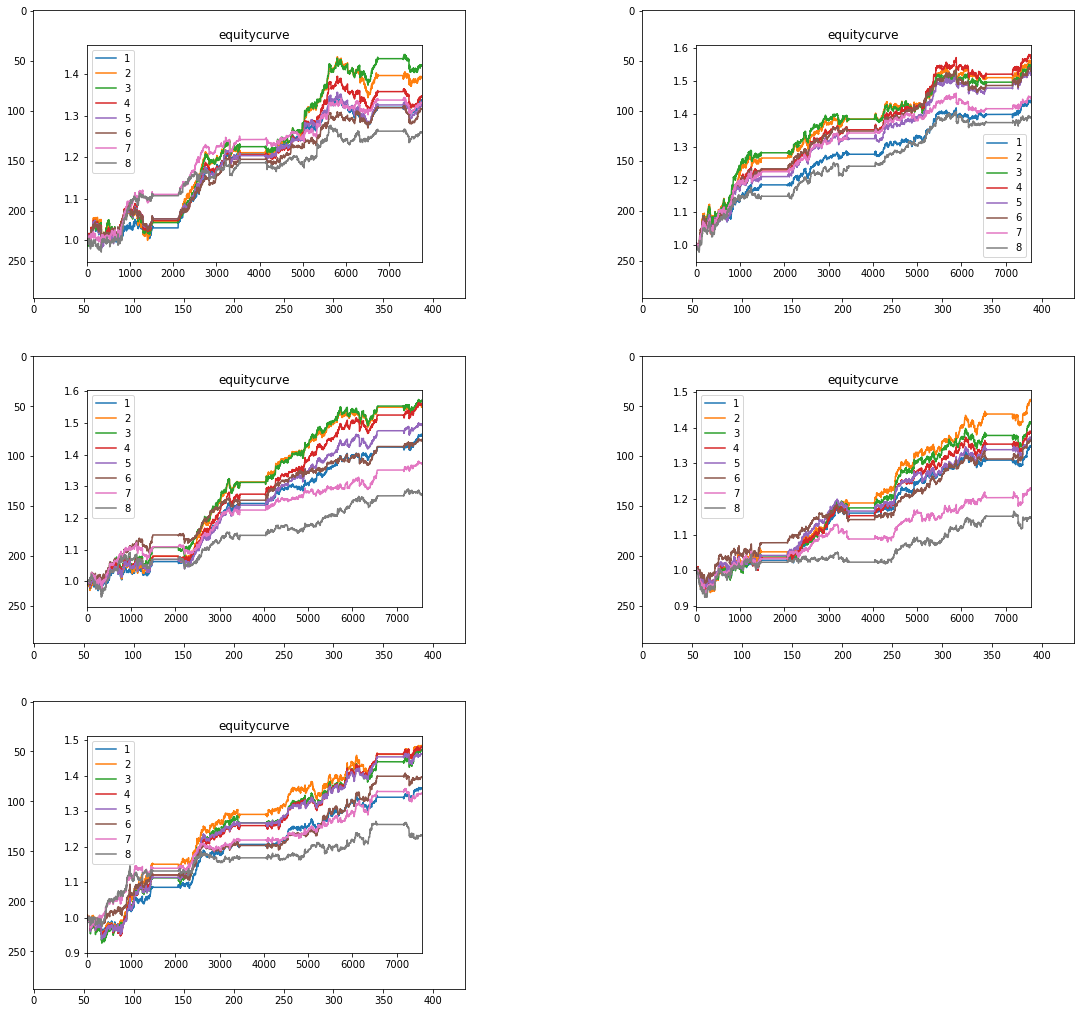

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img0=mpimg.imread('../Validation_IS_Maj_CL2/performance_zn_5min_1701_0.0.png')
img1=mpimg.imread('../Validation_IS_Maj_CL2/performance_zn_5min_1701_1.0.png')
img2=mpimg.imread('../Validation_IS_Maj_CL2/performance_zn_5min_1701_2.0.png')
img3=mpimg.imread('../Validation_IS_Maj_CL2/performance_zn_5min_1701_3.0.png')
img4=mpimg.imread('../Validation_IS_Maj_CL2/performance_zn_5min_1701_4.0.png')
fig = plt.figure(figsize=(20,18))
plt.subplot(321)
plt.imshow(img0)
plt.subplot(322)
plt.imshow(img1)
plt.subplot(323)
plt.imshow(img2)
plt.subplot(324)
plt.imshow(img3)
plt.subplot(325)
plt.imshow(img4)
plt.show()

In [23]:
import pandas as pd
perform1 = pd.read_csv(r'../Validation_IS_Maj_CL2/performance_zn_5min_1701_0.0.csv')
perform2 = pd.read_csv(r'../Validation_IS_Maj_CL2/performance_zn_5min_1701_1.0.csv')
perform3 = pd.read_csv(r'../Validation_IS_Maj_CL2/performance_zn_5min_1701_2.0.csv')
perform4 = pd.read_csv(r'../Validation_IS_Maj_CL2/performance_zn_5min_1701_3.0.csv')
perform5 = pd.read_csv(r'../Validation_IS_Maj_CL2/performance_zn_5min_1701_4.0.csv')
display(perform1)
display(perform2)
display(perform3)
display(perform4)
display(perform5)

,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.188919,0.004427,-0.001792,0.001086,0.000085,-0.018520,0.010718,-0.056494,0.605934,5.858442,3965,1.336459,0.446910
1,2,0.268550,0.005168,-0.002662,0.001503,0.000119,-0.030336,0.014073,-0.079007,0.564391,4.810822,3312,1.392751,0.461957
2,3,0.262606,0.005536,-0.002358,0.001156,0.000137,-0.030041,0.015322,-0.066973,0.490122,5.270259,3068,1.420736,0.630052
3,4,0.252932,0.004574,-0.002295,0.001144,0.000116,-0.028868,0.013020,-0.066939,0.498567,4.520612,2988,1.347596,0.597055
4,5,0.238515,0.004266,-0.002058,0.001000,0.000103,-0.028618,0.010535,-0.063608,0.485890,4.471805,3137,1.324245,0.585591
5,6,0.207393,0.004158,-0.001734,0.000988,0.000111,-0.027640,0.009411,-0.053947,0.569763,5.012303,2835,1.316013,0.590123
6,7,0.205294,0.004349,-0.001451,0.000963,0.000111,-0.027527,0.016598,-0.036482,0.663735,5.296382,2978,1.330544,0.554399
7,8,0.194301,0.003415,-0.001369,0.000963,0.000086,-0.017857,0.014976,-0.036980,0.703831,4.394520,3033,1.259574,0.529179


,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.178840,0.005762,-0.001865,0.001111,0.000115,-0.017707,0.008818,-0.034629,0.595679,8.054202,3802,1.437885,0.476328
1,2,0.264275,0.007324,-0.002729,0.001548,0.000172,-0.029996,0.013385,-0.049527,0.567279,6.928774,3231,1.556655,0.494274
2,3,0.259011,0.007157,-0.002544,0.001229,0.000182,-0.028673,0.011478,-0.047173,0.482955,6.908122,2995,1.543941,0.650417
3,4,0.249881,0.007579,-0.002432,0.001251,0.000200,-0.028219,0.013136,-0.052679,0.514166,7.582354,2878,1.575984,0.633079
4,5,0.238880,0.006892,-0.002089,0.001106,0.000170,-0.026790,0.012755,-0.049004,0.529689,7.212980,3074,1.523804,0.610930
5,6,0.225734,0.007042,-0.001908,0.001127,0.000194,-0.022911,0.012945,-0.045516,0.590604,7.798728,2762,1.535173,0.615134
6,7,0.204900,0.005938,-0.001620,0.001058,0.000156,-0.021590,0.012052,-0.041724,0.653098,7.244952,2884,1.451285,0.590153
7,8,0.191078,0.005138,-0.001458,0.001086,0.000133,-0.028303,0.011812,-0.044942,0.744633,6.722894,2946,1.390517,0.546504


,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.172238,0.006078,-0.001761,0.001102,0.000121,-0.017202,0.013830,-0.043711,0.625609,8.821602,3823,1.461901,0.472142
1,2,0.229813,0.007291,-0.002699,0.001492,0.000170,-0.029439,0.018159,-0.059847,0.552856,7.931094,3263,1.554090,0.494637
2,3,0.223955,0.007514,-0.002474,0.001189,0.000189,-0.028761,0.019769,-0.051202,0.480469,8.387471,3027,1.571040,0.655104
3,4,0.205101,0.007378,-0.002380,0.001193,0.000190,-0.027564,0.016800,-0.043230,0.501392,8.993248,2946,1.560736,0.626612
4,5,0.192002,0.006518,-0.002131,0.001042,0.000160,-0.026136,0.017365,-0.040464,0.488768,8.486709,3097,1.495356,0.619955
5,6,0.191972,0.005881,-0.001843,0.001060,0.000163,-0.024045,0.012224,-0.042710,0.574939,7.658309,2739,1.446934,0.613728
6,7,0.173639,0.004917,-0.001590,0.001004,0.000130,-0.025364,0.010602,-0.048630,0.631455,7.078638,2876,1.373654,0.576495
7,8,0.183972,0.003614,-0.001454,0.001031,0.000091,-0.022752,0.012633,-0.070925,0.709159,4.910913,3009,1.274655,0.525756


,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.173604,0.004588,-0.001772,0.001088,0.000091,-0.017260,0.012210,-0.063480,0.613941,6.606596,3827,1.348668,0.457016
1,2,0.213106,0.006260,-0.002722,0.001505,0.000145,-0.025195,0.017573,-0.072854,0.552913,7.343506,3273,1.475744,0.477849
2,3,0.208399,0.005442,-0.002445,0.001137,0.000138,-0.026470,0.017752,-0.071451,0.464870,6.527875,2987,1.413563,0.646803
3,4,0.199574,0.005090,-0.002363,0.001145,0.000133,-0.026584,0.015809,-0.062988,0.484660,6.375540,2908,1.386807,0.612105
4,5,0.184630,0.004873,-0.002085,0.001001,0.000121,-0.026818,0.017212,-0.055250,0.480200,6.598916,3061,1.370380,0.607971
5,6,0.166058,0.004774,-0.001814,0.001014,0.000131,-0.026088,0.023726,-0.043194,0.559264,7.186612,2769,1.362792,0.609606
6,7,0.166569,0.002980,-0.001561,0.000943,0.000079,-0.026462,0.020991,-0.068385,0.603836,4.473042,2851,1.226502,0.572781
7,8,0.163696,0.001923,-0.001412,0.000957,0.000051,-0.025299,0.025498,-0.077875,0.677735,2.936481,2893,1.146130,0.534739


,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.189180,0.004793,-0.001776,0.001038,0.000095,-0.016900,0.011446,-0.043113,0.584561,6.334193,3815,1.364284,0.469987
1,2,0.235829,0.006358,-0.002711,0.001446,0.000148,-0.028922,0.020254,-0.059712,0.533613,6.739628,3257,1.483178,0.490943
2,3,0.241547,0.006211,-0.002405,0.001163,0.000157,-0.028178,0.021559,-0.075580,0.483533,6.428628,2999,1.472057,0.642881
3,4,0.220294,0.006344,-0.002323,0.001165,0.000166,-0.027527,0.023842,-0.056685,0.501705,7.199838,2909,1.482168,0.619801
4,5,0.215601,0.006084,-0.002116,0.001005,0.000148,-0.026591,0.024082,-0.063711,0.475059,7.054268,3133,1.462355,0.608363
5,6,0.175245,0.005223,-0.001805,0.001011,0.000145,-0.025353,0.009916,-0.032709,0.560158,7.451310,2742,1.396964,0.611962
6,7,0.168310,0.004616,-0.001516,0.000952,0.000122,-0.024855,0.010974,-0.031294,0.628197,6.856740,2884,1.350833,0.578710
7,8,0.199283,0.003056,-0.001421,0.000973,0.000079,-0.023283,0.012149,-0.039836,0.684811,3.834263,2943,1.232288,0.533129


## Major contract, InSample, without trading cost, optimized sizing with CL 

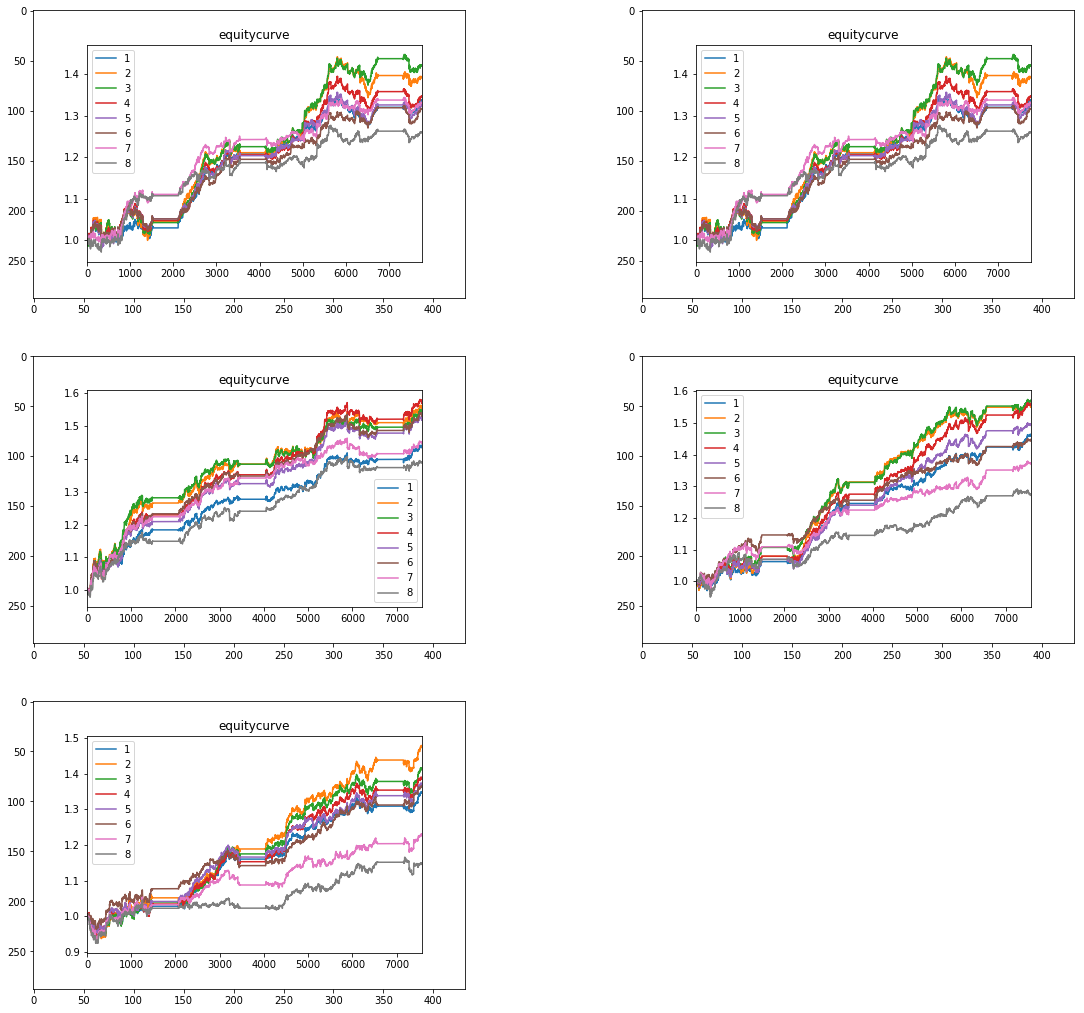

In [2]:
img1=mpimg.imread('../Validation_IS_Maj_CL2/performance_zn_5min_0.0part.png')
img2=mpimg.imread('../Validation_IS_Maj_CL2/performance_zn_5min_1.0part.png')
img3=mpimg.imread('../Validation_IS_Maj_CL2/performance_zn_5min_2.0part.png')
img4=mpimg.imread('../Validation_IS_Maj_CL2/performance_zn_5min_3.0part.png')
img5=mpimg.imread('../Validation_IS_Maj_CL2/performance_zn_5min_4.0part.png')
fig = plt.figure(figsize=(20,18))
plt.subplot(321)
plt.imshow(img0)
plt.subplot(322)
plt.imshow(img1)
plt.subplot(323)
plt.imshow(img2)
plt.subplot(324)
plt.imshow(img3)
plt.subplot(325)
plt.imshow(img4)
plt.show()

In [24]:
import pandas as pd
perform1 = pd.read_csv(r'../Validation_IS_Maj_CL2/performance_zn_5min_0.0part.csv')
perform2 = pd.read_csv(r'../Validation_IS_Maj_CL2/performance_zn_5min_1.0part.csv')
perform3 = pd.read_csv(r'../Validation_IS_Maj_CL2/performance_zn_5min_2.0part.csv')
perform4 = pd.read_csv(r'../Validation_IS_Maj_CL2/performance_zn_5min_3.0part.csv')
perform5 = pd.read_csv(r'../Validation_IS_Maj_CL2/performance_zn_5min_4.0part.csv')
display(perform1)
display(perform2)
display(perform3)
display(perform4)
display(perform5)

,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.188919,0.004427,-0.001792,0.001086,0.000085,-0.018520,0.010718,-0.056494,0.605934,5.858442,3965,1.336459,0.446910
1,2,0.268550,0.005168,-0.002662,0.001503,0.000119,-0.030336,0.014073,-0.079007,0.564391,4.810822,3312,1.392751,0.461957
2,3,0.262606,0.005536,-0.002358,0.001156,0.000137,-0.030041,0.015322,-0.066973,0.490122,5.270259,3068,1.420736,0.630052
3,4,0.252932,0.004574,-0.002295,0.001144,0.000116,-0.028868,0.013020,-0.066939,0.498567,4.520612,2988,1.347596,0.597055
4,5,0.238515,0.004266,-0.002058,0.001000,0.000103,-0.028618,0.010535,-0.063608,0.485890,4.471805,3137,1.324245,0.585591
5,6,0.207393,0.004158,-0.001734,0.000988,0.000111,-0.027640,0.009411,-0.053947,0.569763,5.012303,2835,1.316013,0.590123
6,7,0.205294,0.004349,-0.001451,0.000963,0.000111,-0.027527,0.016598,-0.036482,0.663735,5.296382,2978,1.330544,0.554399
7,8,0.194301,0.003415,-0.001369,0.000963,0.000086,-0.017857,0.014976,-0.036980,0.703831,4.394520,3033,1.259574,0.529179


,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.178840,0.005762,-0.001865,0.001111,0.000115,-0.017707,0.008818,-0.034629,0.595679,8.054202,3802,1.437885,0.476328
1,2,0.264275,0.007324,-0.002729,0.001548,0.000172,-0.029996,0.013385,-0.049527,0.567279,6.928774,3231,1.556655,0.494274
2,3,0.259011,0.007157,-0.002544,0.001229,0.000182,-0.028673,0.011478,-0.047173,0.482955,6.908122,2995,1.543941,0.650417
3,4,0.249881,0.007579,-0.002432,0.001251,0.000200,-0.028219,0.013136,-0.052679,0.514166,7.582354,2878,1.575984,0.633079
4,5,0.238880,0.006892,-0.002089,0.001106,0.000170,-0.026790,0.012755,-0.049004,0.529689,7.212980,3074,1.523804,0.610930
5,6,0.225734,0.007042,-0.001908,0.001127,0.000194,-0.022911,0.012945,-0.045516,0.590604,7.798728,2762,1.535173,0.615134
6,7,0.204900,0.005938,-0.001620,0.001058,0.000156,-0.021590,0.012052,-0.041724,0.653098,7.244952,2884,1.451285,0.590153
7,8,0.191078,0.005138,-0.001458,0.001086,0.000133,-0.028303,0.011812,-0.044942,0.744633,6.722894,2946,1.390517,0.546504


,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.172238,0.006078,-0.001761,0.001102,0.000121,-0.017202,0.013830,-0.043711,0.625609,8.821602,3823,1.461901,0.472142
1,2,0.229813,0.007291,-0.002699,0.001492,0.000170,-0.029439,0.018159,-0.059847,0.552856,7.931094,3263,1.554090,0.494637
2,3,0.223955,0.007514,-0.002474,0.001189,0.000189,-0.028761,0.019769,-0.051202,0.480469,8.387471,3027,1.571040,0.655104
3,4,0.205101,0.007378,-0.002380,0.001193,0.000190,-0.027564,0.016800,-0.043230,0.501392,8.993248,2946,1.560736,0.626612
4,5,0.192002,0.006518,-0.002131,0.001042,0.000160,-0.026136,0.017365,-0.040464,0.488768,8.486709,3097,1.495356,0.619955
5,6,0.191972,0.005881,-0.001843,0.001060,0.000163,-0.024045,0.012224,-0.042710,0.574939,7.658309,2739,1.446934,0.613728
6,7,0.173639,0.004917,-0.001590,0.001004,0.000130,-0.025364,0.010602,-0.048630,0.631455,7.078638,2876,1.373654,0.576495
7,8,0.183972,0.003614,-0.001454,0.001031,0.000091,-0.022752,0.012633,-0.070925,0.709159,4.910913,3009,1.274655,0.525756


,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.173604,0.004588,-0.001772,0.001088,0.000091,-0.017260,0.012210,-0.063480,0.613941,6.606596,3827,1.348668,0.457016
1,2,0.213106,0.006260,-0.002722,0.001505,0.000145,-0.025195,0.017573,-0.072854,0.552913,7.343506,3273,1.475744,0.477849
2,3,0.208399,0.005442,-0.002445,0.001137,0.000138,-0.026470,0.017752,-0.071451,0.464870,6.527875,2987,1.413563,0.646803
3,4,0.199574,0.005090,-0.002363,0.001145,0.000133,-0.026584,0.015809,-0.062988,0.484660,6.375540,2908,1.386807,0.612105
4,5,0.184630,0.004873,-0.002085,0.001001,0.000121,-0.026818,0.017212,-0.055250,0.480200,6.598916,3061,1.370380,0.607971
5,6,0.166058,0.004774,-0.001814,0.001014,0.000131,-0.026088,0.023726,-0.043194,0.559264,7.186612,2769,1.362792,0.609606
6,7,0.166569,0.002980,-0.001561,0.000943,0.000079,-0.026462,0.020991,-0.068385,0.603836,4.473042,2851,1.226502,0.572781
7,8,0.163696,0.001923,-0.001412,0.000957,0.000051,-0.025299,0.025498,-0.077875,0.677735,2.936481,2893,1.146130,0.534739


,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.189180,0.004793,-0.001776,0.001038,0.000095,-0.016900,0.011446,-0.043113,0.584561,6.334193,3815,1.364284,0.469987
1,2,0.235829,0.006358,-0.002711,0.001446,0.000148,-0.028922,0.020254,-0.059712,0.533613,6.739628,3257,1.483178,0.490943
2,3,0.241547,0.006211,-0.002405,0.001163,0.000157,-0.028178,0.021559,-0.075580,0.483533,6.428628,2999,1.472057,0.642881
3,4,0.220294,0.006344,-0.002323,0.001165,0.000166,-0.027527,0.023842,-0.056685,0.501705,7.199838,2909,1.482168,0.619801
4,5,0.215601,0.006084,-0.002116,0.001005,0.000148,-0.026591,0.024082,-0.063711,0.475059,7.054268,3133,1.462355,0.608363
5,6,0.175245,0.005223,-0.001805,0.001011,0.000145,-0.025353,0.009916,-0.032709,0.560158,7.451310,2742,1.396964,0.611962
6,7,0.168310,0.004616,-0.001516,0.000952,0.000122,-0.024855,0.010974,-0.031294,0.628197,6.856740,2884,1.350833,0.578710
7,8,0.199283,0.003056,-0.001421,0.000973,0.000079,-0.023283,0.012149,-0.039836,0.684811,3.834263,2943,1.232288,0.533129


## Contract 1701,OutSample, without trading cost, optimized sizing with CL 

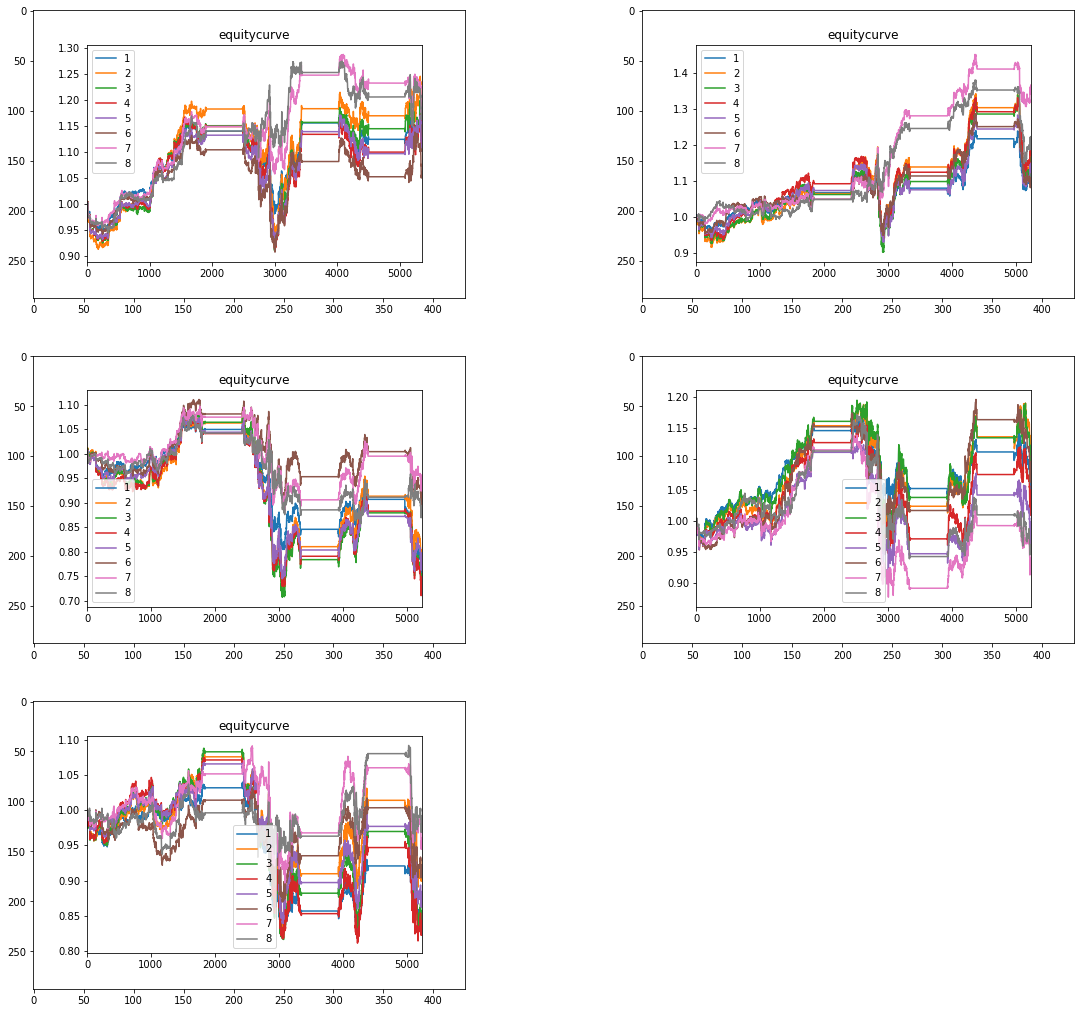

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img0=mpimg.imread('../Validation_OS_Maj_CL2/performance_zn_5min_1701_0.0.png')
img1=mpimg.imread('../Validation_OS_Maj_CL2/performance_zn_5min_1701_1.0.png')
img2=mpimg.imread('../Validation_OS_Maj_CL2/performance_zn_5min_1701_2.0.png')
img3=mpimg.imread('../Validation_OS_Maj_CL2/performance_zn_5min_1701_3.0.png')
img4=mpimg.imread('../Validation_OS_Maj_CL2/performance_zn_5min_1701_4.0.png')
fig = plt.figure(figsize=(20,18))
plt.subplot(321)
plt.imshow(img0)
plt.subplot(322)
plt.imshow(img1)
plt.subplot(323)
plt.imshow(img2)
plt.subplot(324)
plt.imshow(img3)
plt.subplot(325)
plt.imshow(img4)
plt.show()

In [25]:
import pandas as pd
perform1 = pd.read_csv(r'../Validation_OS_Maj_CL2/performance_zn_5min_1701_0.0.csv')
perform2 = pd.read_csv(r'../Validation_OS_Maj_CL2/performance_zn_5min_1701_1.0.csv')
perform3 = pd.read_csv(r'../Validation_OS_Maj_CL2/performance_zn_5min_1701_2.0.csv')
perform4 = pd.read_csv(r'../Validation_OS_Maj_CL2/performance_zn_5min_1701_3.0.csv')
perform5 = pd.read_csv(r'../Validation_OS_Maj_CL2/performance_zn_5min_1701_4.0.csv')
display(perform1)
display(perform2)
display(perform3)
display(perform4)
display(perform5)

,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.388350,0.002869,-0.003161,0.001813,0.000058,-0.040635,0.025691,-0.151672,0.573659,1.846902,2222,1.129104,0.487849
1,2,0.519730,0.004159,-0.004748,0.002502,0.000096,-0.067126,0.038483,-0.225646,0.526893,2.000618,1956,1.187161,0.511759
2,3,0.501770,0.003134,-0.004609,0.002118,0.000078,-0.065901,0.038025,-0.219686,0.459457,1.561301,1798,1.141014,0.643493
3,4,0.481079,0.002497,-0.004518,0.002114,0.000064,-0.063918,0.036591,-0.218094,0.468008,1.297695,1754,1.112373,0.625998
4,5,0.441241,0.002515,-0.004173,0.001918,0.000062,-0.060265,0.032817,-0.199051,0.459738,1.425119,1834,1.113188,0.614504
5,6,0.434695,0.001387,-0.003746,0.001947,0.000038,-0.057706,0.029072,-0.198838,0.519898,0.797465,1643,1.062398,0.601339
6,7,0.429306,0.004127,-0.003463,0.001887,0.000105,-0.046897,0.027265,-0.114653,0.544923,2.403087,1761,1.185699,0.601931
7,8,0.398936,0.003802,-0.003044,0.001967,0.000092,-0.043726,0.031471,-0.098126,0.645982,2.382349,1852,1.171073,0.551836


,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.526100,0.003005,-0.003577,0.001805,0.000063,-0.046521,0.021440,-0.156690,0.504624,1.427805,2145,1.135210,0.534732
1,2,0.690640,0.003810,-0.005471,0.002447,0.000088,-0.068861,0.028151,-0.214960,0.447313,1.379071,1942,1.171440,0.558702
2,3,0.708731,0.003706,-0.005191,0.002185,0.000093,-0.068848,0.030648,-0.221860,0.420853,1.307147,1792,1.166755,0.683036
3,4,0.665056,0.004321,-0.005062,0.002162,0.000110,-0.067299,0.026045,-0.210538,0.427107,1.624381,1760,1.194455,0.671023
4,5,0.642831,0.003319,-0.004766,0.001976,0.000083,-0.066067,0.022519,-0.204198,0.414590,1.290688,1808,1.149345,0.664823
5,6,0.545736,0.002366,-0.004261,0.002033,0.000065,-0.061520,0.027912,-0.176733,0.477090,1.084010,1636,1.106485,0.640587
6,7,0.431951,0.008142,-0.003720,0.002113,0.000224,-0.053379,0.022324,-0.121707,0.567982,4.712614,1638,1.366411,0.619658
7,8,0.571051,0.004964,-0.003323,0.002149,0.000131,-0.071281,0.024024,-0.167417,0.646671,2.173051,1707,1.223366,0.570006


,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.418863,-0.004856,-0.003482,0.001687,-0.000103,-0.040681,0.016791,-0.297645,0.484563,-2.898552,2127,0.781463,0.495063
1,2,0.570915,-0.004360,-0.005238,0.002398,-0.000104,-0.066650,0.024351,-0.339441,0.457871,-1.909062,1886,0.803816,0.521739
2,3,0.599697,-0.005442,-0.005198,0.002047,-0.000140,-0.066042,0.026282,-0.357623,0.393730,-2.268795,1749,0.755094,0.648942
3,4,0.572394,-0.005585,-0.005107,0.002080,-0.000148,-0.065582,0.023981,-0.345173,0.407209,-2.439319,1696,0.748675,0.636792
4,5,0.499373,-0.004496,-0.004746,0.001900,-0.000115,-0.064311,0.020817,-0.313684,0.400330,-2.250965,1756,0.797667,0.626424
5,6,0.428414,-0.001695,-0.004292,0.002047,-0.000047,-0.061051,0.024550,-0.193653,0.476855,-0.989291,1617,0.923711,0.608534
6,7,0.408060,-0.000961,-0.003760,0.001957,-0.000026,-0.059227,0.024035,-0.194686,0.520502,-0.588605,1683,0.956767,0.594177
7,8,0.387643,-0.002355,-0.003483,0.002040,-0.000064,-0.059977,0.022917,-0.203975,0.585885,-1.518832,1657,0.894022,0.548582


,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.316905,0.001625,-0.003276,0.001753,3.402171e-05,-0.038604,0.021744,-0.118473,0.535092,1.281714,2149,1.073113,0.508143
1,2,0.451576,0.003036,-0.004891,0.002421,7.105559e-05,-0.062950,0.021730,-0.201700,0.495014,1.681023,1923,1.136640,0.528341
2,3,0.472061,0.002694,-0.004716,0.002070,6.750801e-05,-0.062678,0.023742,-0.185208,0.438944,1.426893,1796,1.121244,0.659243
3,4,0.465259,0.001094,-0.004670,0.002047,2.820686e-05,-0.063057,0.019034,-0.181527,0.438268,0.588073,1746,1.049249,0.639748
4,5,0.436922,-0.000032,-0.004376,0.001854,-8.014544e-07,-0.061716,0.017360,-0.186637,0.423767,-0.018302,1796,0.998561,0.634187
5,6,0.452282,0.002102,-0.003895,0.001968,5.674646e-05,-0.058273,0.026767,-0.161054,0.505173,1.161964,1667,1.094596,0.613077
6,7,0.437532,-0.001325,-0.003690,0.001795,-3.465366e-05,-0.062093,0.016868,-0.230540,0.486393,-0.756825,1720,0.940396,0.604651
7,8,0.377334,-0.000925,-0.003458,0.001950,-2.431695e-05,-0.060208,0.032927,-0.198489,0.564009,-0.612934,1712,0.958369,0.565421


,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.357352,-0.003513,-0.003206,0.001670,-0.000076,-0.031671,0.021416,-0.210326,0.520810,-2.457797,2084,0.841906,0.500000
1,2,0.476550,-0.001880,-0.004741,0.002352,-0.000045,-0.050635,0.028120,-0.229198,0.496106,-0.986036,1887,0.915419,0.522523
2,3,0.500208,-0.003270,-0.004608,0.002065,-0.000085,-0.052185,0.030615,-0.249458,0.448117,-1.634353,1741,0.852847,0.635841
3,4,0.501779,-0.003596,-0.004558,0.002046,-0.000096,-0.053950,0.026899,-0.245047,0.448907,-1.791638,1686,0.838179,0.626928
4,5,0.479226,-0.002683,-0.004144,0.001864,-0.000068,-0.053161,0.027213,-0.213422,0.449832,-1.399599,1766,0.879270,0.616648
5,6,0.427277,-0.001747,-0.003657,0.001924,-0.000048,-0.047924,0.035502,-0.157715,0.526187,-1.021902,1625,0.921406,0.587692
6,7,0.462232,-0.000881,-0.003391,0.001856,-0.000023,-0.051923,0.025999,-0.178366,0.547197,-0.476413,1717,0.960362,0.589983
7,8,0.415920,-0.000284,-0.002906,0.001995,-0.000007,-0.063890,0.032667,-0.124922,0.686250,-0.170607,1706,0.987227,0.536928


## Major contract, OutSample, without trading cost, optimized sizing with CL 

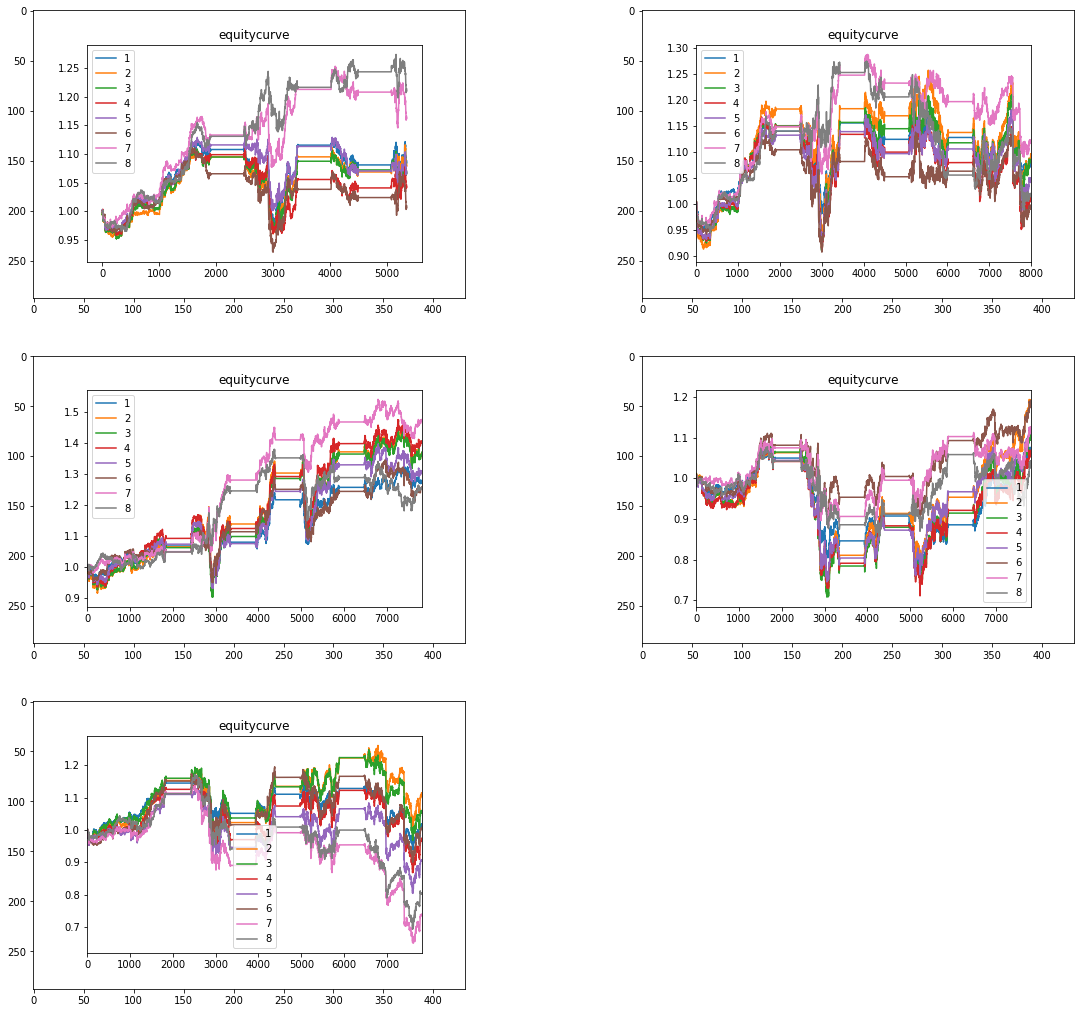

In [10]:
img1=mpimg.imread('../Validation_OS_Maj_CL2/performance_zn_5min_0.0part.png')
img2=mpimg.imread('../Validation_OS_Maj_CL2/performance_zn_5min_1.0part.png')
img3=mpimg.imread('../Validation_OS_Maj_CL2/performance_zn_5min_2.0part.png')
img4=mpimg.imread('../Validation_OS_Maj_CL2/performance_zn_5min_3.0part.png')
img5=mpimg.imread('../Validation_OS_Maj_CL2/performance_zn_5min_4.0part.png')
fig = plt.figure(figsize=(20,18))
plt.subplot(321)
plt.imshow(img0)
plt.subplot(322)
plt.imshow(img1)
plt.subplot(323)
plt.imshow(img2)
plt.subplot(324)
plt.imshow(img3)
plt.subplot(325)
plt.imshow(img4)
plt.show()

In [26]:
import pandas as pd
perform1 = pd.read_csv(r'../Validation_OS_Maj_CL2/performance_zn_5min_0.0part.csv')
perform2 = pd.read_csv(r'../Validation_OS_Maj_CL2/performance_zn_5min_1.0part.csv')
perform3 = pd.read_csv(r'../Validation_OS_Maj_CL2/performance_zn_5min_2.0part.csv')
perform4 = pd.read_csv(r'../Validation_OS_Maj_CL2/performance_zn_5min_3.0part.csv')
perform5 = pd.read_csv(r'../Validation_OS_Maj_CL2/performance_zn_5min_4.0part.csv')
display(perform1)
display(perform2)
display(perform3)
display(perform4)
display(perform5)

,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.388762,0.001097,-0.003410,0.001879,0.000023,-0.073719,0.025691,-0.151672,0.551010,0.705341,3439,1.077876,0.500727
1,2,0.558411,0.001330,-0.005160,0.002566,0.000031,-0.108693,0.038483,-0.225646,0.497383,0.595263,3075,1.094402,0.522602
2,3,0.536526,0.001175,-0.005068,0.002218,0.000030,-0.108503,0.038025,-0.219686,0.437614,0.547458,2823,1.083418,0.656040
3,4,0.507155,0.000130,-0.004849,0.002201,0.000003,-0.101292,0.036591,-0.218094,0.453868,0.063945,2771,1.009210,0.634428
4,5,0.485438,0.000636,-0.004588,0.002006,0.000016,-0.100337,0.032817,-0.199051,0.437346,0.327685,2868,1.045176,0.629707
5,6,0.426343,-0.000074,-0.004009,0.002031,-0.000002,-0.079843,0.029072,-0.198838,0.506692,-0.043222,2619,0.994767,0.610157
6,7,0.413387,0.001692,-0.003668,0.001943,0.000043,-0.069899,0.027265,-0.153519,0.529584,1.023554,2776,1.120167,0.605908
7,8,0.415242,0.000231,-0.003280,0.002048,0.000006,-0.061913,0.031471,-0.225134,0.624291,0.139353,2836,1.016434,0.554654


,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.460455,0.003913,-0.003550,0.001901,0.000084,-0.046521,0.024813,-0.156690,0.535441,2.124340,3296,1.277799,0.545813
1,2,0.622300,0.005203,-0.005333,0.002562,0.000122,-0.068861,0.030962,-0.214960,0.480439,2.090361,3029,1.369436,0.569165
2,3,0.643831,0.005212,-0.005204,0.002325,0.000132,-0.068848,0.030648,-0.221860,0.446697,2.023701,2810,1.370030,0.683630
3,4,0.601922,0.005722,-0.004948,0.002288,0.000147,-0.067299,0.028573,-0.210538,0.462425,2.376707,2770,1.406288,0.671480
4,5,0.583195,0.004341,-0.004666,0.002110,0.000109,-0.066067,0.029080,-0.204198,0.452188,1.860663,2825,1.308177,0.662301
5,6,0.490287,0.003648,-0.004305,0.002172,0.000101,-0.061520,0.036797,-0.176733,0.504644,1.860343,2565,1.259037,0.644444
6,7,0.406394,0.006705,-0.003791,0.002157,0.000184,-0.053379,0.029652,-0.121707,0.568954,4.124456,2585,1.476027,0.625919
7,8,0.510196,0.003610,-0.003399,0.002230,0.000097,-0.071281,0.035682,-0.167417,0.656177,1.769085,2639,1.256333,0.574839


,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.407187,0.000895,-0.003465,0.001847,0.000019,-0.040681,0.028871,-0.297645,0.533143,0.549336,3325,1.063526,0.524812
1,2,0.552793,0.002507,-0.005233,0.002561,0.000059,-0.066650,0.036026,-0.339441,0.489472,1.133773,3024,1.177995,0.549272
2,3,0.575114,0.001321,-0.005215,0.002261,0.000034,-0.066042,0.033257,-0.357623,0.433538,0.574127,2791,1.093774,0.668578
3,4,0.537955,0.000739,-0.005092,0.002230,0.000019,-0.065582,0.033246,-0.345173,0.437881,0.343607,2730,1.052496,0.658608
4,5,0.491877,0.001553,-0.004724,0.002071,0.000039,-0.064311,0.033836,-0.313684,0.438518,0.789532,2800,1.110292,0.648571
5,6,0.425341,0.002451,-0.004343,0.002184,0.000068,-0.061051,0.024550,-0.193653,0.502836,1.440771,2555,1.174041,0.631311
6,7,0.403441,0.001550,-0.003827,0.002106,0.000042,-0.059227,0.030088,-0.194686,0.550412,0.960523,2636,1.110054,0.607739
7,8,0.420265,0.000354,-0.003508,0.002145,0.000009,-0.059977,0.022917,-0.203975,0.611476,0.210540,2656,1.025129,0.569654


,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.359159,0.000099,-0.003448,0.001814,0.000002,-0.056199,0.021744,-0.195365,0.526037,0.069103,3316,1.007049,0.521713
1,2,0.511499,0.001541,-0.005070,0.002489,0.000036,-0.083427,0.021730,-0.201700,0.490885,0.753110,3023,1.109401,0.541515
2,3,0.520577,0.000739,-0.004936,0.002181,0.000019,-0.084306,0.023742,-0.224530,0.441853,0.355108,2803,1.052501,0.661791
3,4,0.504841,-0.000384,-0.004846,0.002143,-0.000010,-0.080081,0.019034,-0.249300,0.442333,-0.190219,2735,0.972727,0.647532
4,5,0.502855,-0.001332,-0.004574,0.001980,-0.000034,-0.080455,0.018711,-0.288242,0.432919,-0.662091,2784,0.905446,0.640805
5,6,0.518269,0.000123,-0.004315,0.002075,0.000003,-0.078445,0.026767,-0.246536,0.480832,0.059342,2564,1.008734,0.630265
6,7,0.507826,-0.003672,-0.003955,0.001889,-0.000098,-0.065873,0.016868,-0.428701,0.477702,-1.807659,2670,0.739295,0.611610
7,8,0.477465,-0.002739,-0.003562,0.002018,-0.000072,-0.060208,0.032927,-0.407189,0.566441,-1.433878,2700,0.805566,0.573704


,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.425556,-0.000287,-0.003301,0.001828,-0.000006,-0.046427,0.021416,-0.210326,0.553816,-0.168604,3272,0.979623,0.518643
1,2,0.567357,0.002374,-0.004915,0.002550,0.000056,-0.068946,0.028120,-0.229198,0.518860,1.046238,3003,1.168580,0.543790
2,3,0.594850,0.000986,-0.004779,0.002292,0.000025,-0.070819,0.030615,-0.249458,0.479494,0.414447,2775,1.070016,0.647568
3,4,0.600716,0.000921,-0.004770,0.002249,0.000024,-0.069167,0.026899,-0.245047,0.471433,0.383240,2698,1.065382,0.646034
4,5,0.576959,0.000873,-0.004331,0.002080,0.000022,-0.070177,0.027213,-0.213422,0.480310,0.378137,2796,1.061960,0.630186
5,6,0.502774,0.000884,-0.003981,0.002118,0.000024,-0.065227,0.035502,-0.157715,0.532001,0.439763,2566,1.062793,0.612237
6,7,0.518017,0.001410,-0.003604,0.002040,0.000038,-0.065296,0.025999,-0.178366,0.566054,0.680534,2659,1.100118,0.605115
7,8,0.451181,0.001433,-0.003260,0.002161,0.000038,-0.063890,0.032667,-0.131304,0.662835,0.794149,2677,1.101759,0.563691


# 3. take into account the trading cost(fixed at 1.2 bp)

## Contract 1701, InSample, with fixed trading cost 1.2 bp, optimized sizing with CL 

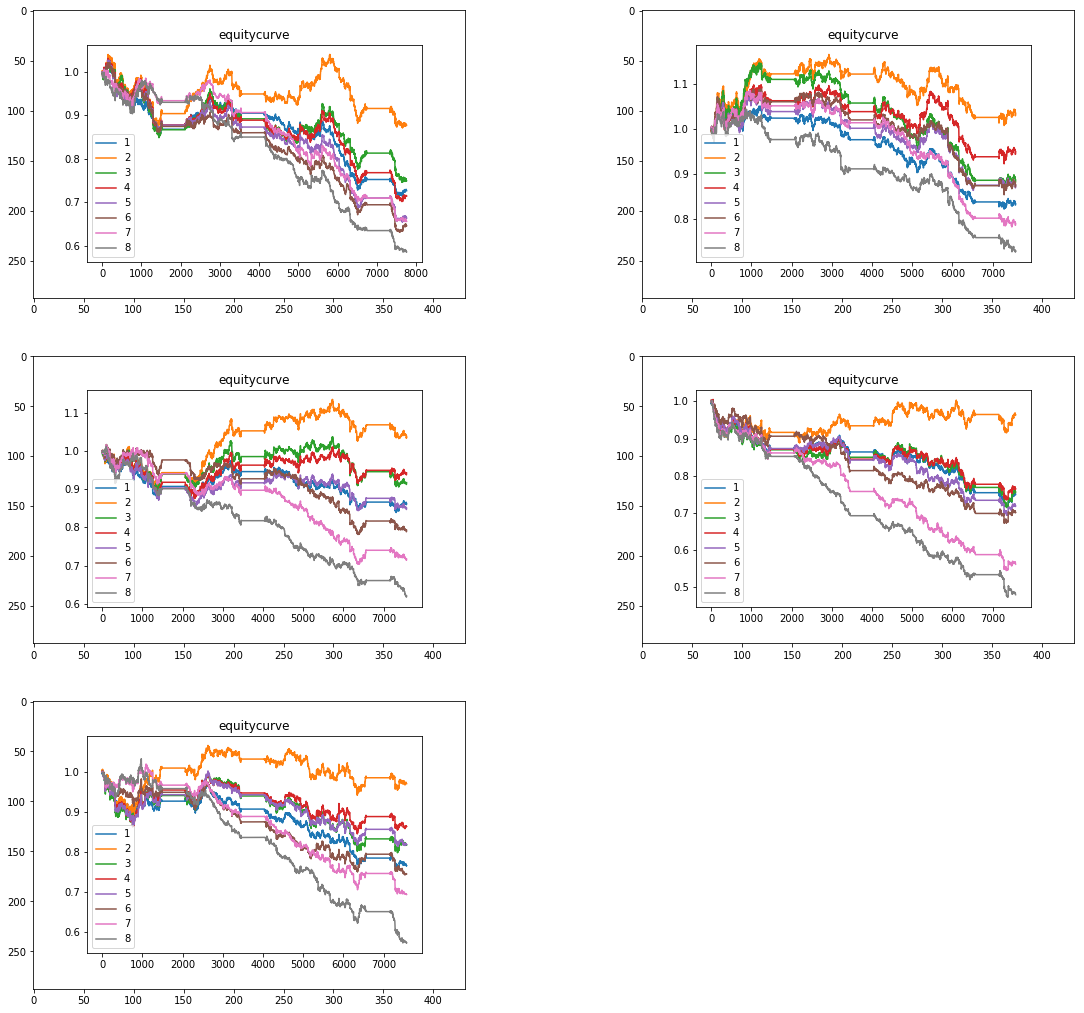

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img0=mpimg.imread('../Validation_IS/performance_zn_5min_1701_0.0.png')
img1=mpimg.imread('../Validation_IS/performance_zn_5min_1701_1.0.png')
img2=mpimg.imread('../Validation_IS/performance_zn_5min_1701_2.0.png')
img3=mpimg.imread('../Validation_IS/performance_zn_5min_1701_3.0.png')
img4=mpimg.imread('../Validation_IS/performance_zn_5min_1701_4.0.png')
fig = plt.figure(figsize=(20,18))
plt.subplot(321)
plt.imshow(img0)
plt.subplot(322)
plt.imshow(img1)
plt.subplot(323)
plt.imshow(img2)
plt.subplot(324)
plt.imshow(img3)
plt.subplot(325)
plt.imshow(img4)
plt.show()

In [28]:
import pandas as pd
perform1 = pd.read_csv(r'../Validation_IS/performance_zn_5min_1701_0.0.csv')
perform2 = pd.read_csv(r'../Validation_IS/performance_zn_5min_1701_1.0.csv')
perform3 = pd.read_csv(r'../Validation_IS/performance_zn_5min_1701_2.0.csv')
perform4 = pd.read_csv(r'../Validation_IS/performance_zn_5min_1701_3.0.csv')
perform5 = pd.read_csv(r'../Validation_IS/performance_zn_5min_1701_4.0.csv')
display(perform1)
display(perform2)
display(perform3)
display(perform4)
display(perform5)

,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.189603,-0.003592,-0.001324,0.000993,-0.000069,-0.018880,0.010598,-0.298350,0.750137,-4.736726,3965,0.726979,0.428247
1,2,0.267138,-0.001611,-0.001810,0.001442,-0.000037,-0.031296,0.013953,-0.163342,0.796796,-1.507313,3312,0.877591,0.436292
2,3,0.262571,-0.003292,-0.001757,0.001207,-0.000082,-0.031001,0.015202,-0.272109,0.687006,-3.134290,3068,0.749816,0.523142
3,4,0.254024,-0.003754,-0.001894,0.001085,-0.000095,-0.029828,0.012900,-0.319469,0.572708,-3.694272,2988,0.714716,0.544846
4,5,0.240256,-0.004421,-0.001481,0.001006,-0.000107,-0.029578,0.010295,-0.362278,0.679057,-4.600286,3137,0.664005,0.492509
5,6,0.210723,-0.004654,-0.001347,0.000994,-0.000125,-0.028600,0.009291,-0.382012,0.738146,-5.521499,2835,0.646293,0.485714
6,7,0.205672,-0.004520,-0.001182,0.000950,-0.000115,-0.028487,0.016478,-0.347562,0.803140,-5.493804,2978,0.656504,0.461383
7,8,0.194809,-0.005446,-0.001142,0.000939,-0.000136,-0.018337,0.014856,-0.414311,0.821883,-6.988403,3033,0.586134,0.441147


,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.175037,-0.002174,-0.001381,0.001024,-0.000043,-0.018604,0.008698,-0.221099,0.741354,-3.105266,3802,0.834765,0.453183
1,2,0.259744,0.000465,-0.001906,0.001483,0.000011,-0.031076,0.013265,-0.135214,0.777999,0.447999,3231,1.035375,0.467657
2,3,0.254721,-0.001483,-0.001877,0.001282,-0.000038,-0.029753,0.011358,-0.247412,0.682770,-1.455394,2995,0.887301,0.545242
3,4,0.244107,-0.000657,-0.002060,0.001184,-0.000017,-0.029299,0.013016,-0.159685,0.574943,-0.672910,2878,0.950064,0.583044
4,5,0.234868,-0.001642,-0.001605,0.001097,-0.000041,-0.027414,0.012635,-0.204694,0.683242,-1.747848,3074,0.875204,0.528627
5,6,0.220535,-0.001625,-0.001477,0.001123,-0.000045,-0.023871,0.012825,-0.215644,0.760189,-1.842209,2762,0.876493,0.520275
6,7,0.200293,-0.002751,-0.001358,0.001035,-0.000072,-0.022489,0.011572,-0.279063,0.762357,-3.433696,2884,0.790925,0.504854
7,8,0.188593,-0.003555,-0.001238,0.001050,-0.000092,-0.029263,0.011416,-0.303436,0.848725,-4.712918,2946,0.729797,0.467413


,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.169710,-0.001809,-0.001353,0.001004,-0.000036,-0.018282,0.013710,-0.161017,0.742158,-2.665123,3823,0.862501,0.454094
1,2,0.225070,0.000504,-0.001861,0.001422,0.000012,-0.030519,0.018039,-0.110345,0.763942,0.560210,3263,1.038330,0.469200
2,3,0.220254,-0.001088,-0.001893,0.001206,-0.000027,-0.029841,0.019649,-0.127075,0.636861,-1.235420,3027,0.917280,0.561943
3,4,0.202046,-0.000758,-0.001974,0.001125,-0.000020,-0.028524,0.016680,-0.127686,0.570219,-0.938159,2946,0.942376,0.576714
4,5,0.190002,-0.001971,-0.001578,0.001027,-0.000048,-0.027216,0.017245,-0.156355,0.651198,-2.592834,3097,0.850236,0.534065
5,6,0.192153,-0.002732,-0.001440,0.001051,-0.000076,-0.024765,0.012104,-0.231843,0.730020,-3.555031,2739,0.792334,0.515517
6,7,0.174862,-0.003727,-0.001283,0.000983,-0.000098,-0.026564,0.010362,-0.307209,0.766636,-5.328011,2876,0.716774,0.485396
7,8,0.187279,-0.004996,-0.001217,0.000985,-0.000126,-0.023832,0.012393,-0.390473,0.809042,-6.669350,3009,0.620295,0.452310


,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.174737,-0.003283,-0.001342,0.000995,-0.000065,-0.017740,0.012090,-0.284269,0.741250,-4.697519,3827,0.750468,0.438202
1,2,0.212502,-0.000473,-0.001844,0.001440,-0.000011,-0.025675,0.017453,-0.115709,0.781047,-0.556286,3273,0.964064,0.452796
2,3,0.207617,-0.003206,-0.001870,0.001154,-0.000082,-0.026950,0.017512,-0.286948,0.617197,-3.860805,2987,0.756323,0.550385
3,4,0.199621,-0.003094,-0.001943,0.001080,-0.000081,-0.027064,0.015569,-0.268930,0.555938,-3.874995,2908,0.764847,0.559147
4,5,0.184635,-0.003700,-0.001526,0.000998,-0.000092,-0.027298,0.016972,-0.308043,0.654019,-5.010229,3061,0.718780,0.513884
5,6,0.164044,-0.003928,-0.001440,0.001003,-0.000108,-0.026568,0.023486,-0.330260,0.696734,-5.986208,2769,0.701472,0.512459
6,7,0.167435,-0.005759,-0.001299,0.000921,-0.000154,-0.026942,0.020751,-0.456824,0.709409,-8.599154,2851,0.562302,0.478078
7,8,0.165539,-0.006839,-0.001210,0.000930,-0.000180,-0.025779,0.025378,-0.527455,0.768513,-10.328090,2893,0.480250,0.445904


,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.190222,-0.003070,-0.001331,0.000946,-0.000061,-0.018220,0.011206,-0.239848,0.711101,-4.034689,3815,0.766684,0.448493
1,2,0.233913,-0.000381,-0.001844,0.001377,-0.000009,-0.030242,0.020014,-0.116552,0.746724,-0.407565,3257,0.971018,0.465152
2,3,0.241836,-0.002389,-0.001818,0.001203,-0.000061,-0.029618,0.021319,-0.203626,0.661601,-2.469907,2999,0.818417,0.540847
3,4,0.220693,-0.001783,-0.001910,0.001109,-0.000047,-0.028967,0.023602,-0.157082,0.580431,-2.019239,2909,0.864528,0.564455
4,5,0.215831,-0.002376,-0.001483,0.001013,-0.000058,-0.028031,0.023842,-0.188017,0.683214,-2.752587,3133,0.819395,0.512608
5,6,0.175450,-0.003349,-0.001435,0.000989,-0.000093,-0.026673,0.009676,-0.259027,0.689394,-4.771866,2742,0.745484,0.518235
6,7,0.168863,-0.004021,-0.001246,0.000931,-0.000106,-0.026055,0.010854,-0.319662,0.747338,-5.952483,2884,0.694433,0.484743
7,8,0.200990,-0.005606,-0.001164,0.000957,-0.000145,-0.024843,0.011909,-0.445051,0.821658,-6.972606,2943,0.573968,0.440027


## Major contract, InSample, with fixed trading cost 1.2 bp, optimized sizing with CL 

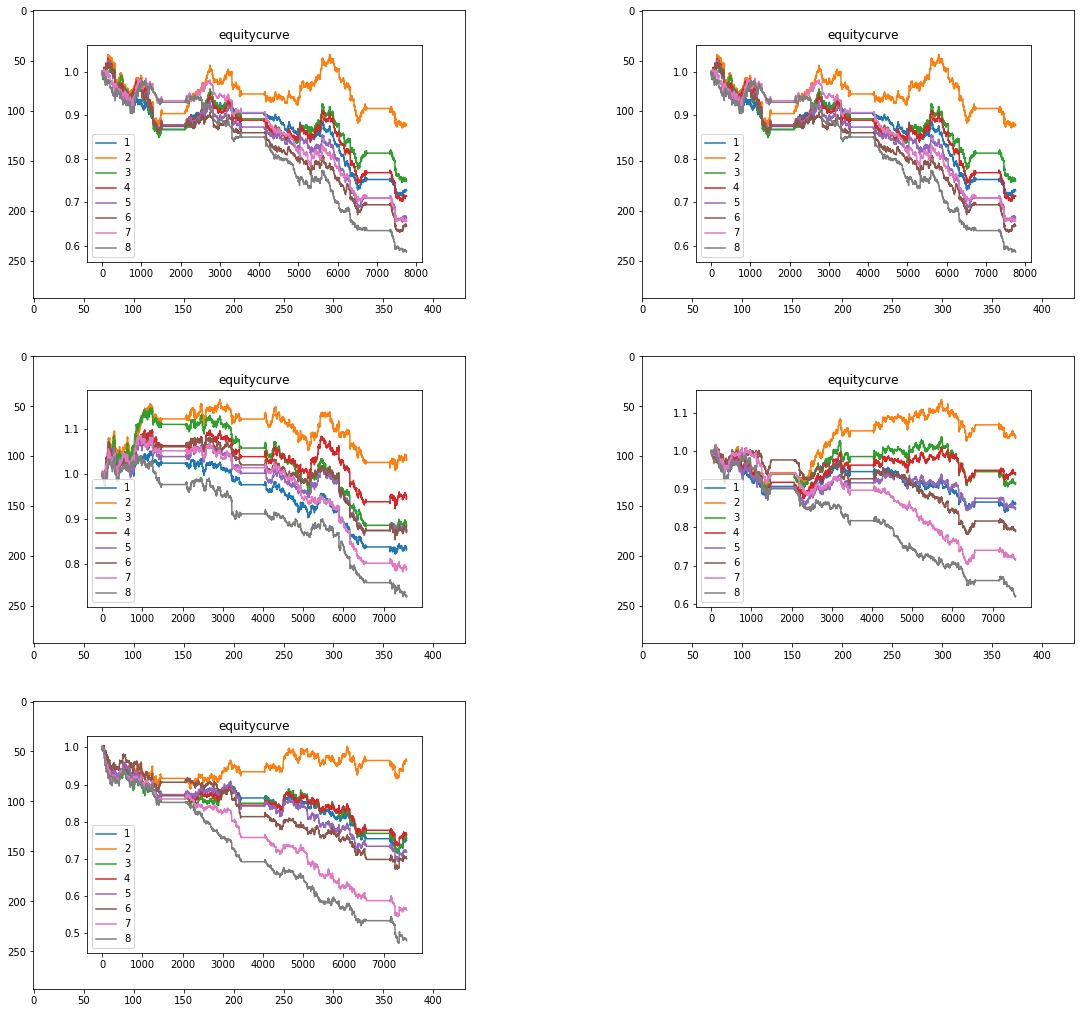

In [14]:
img1=mpimg.imread('../Validation_IS/performance_zn_5min_0.0part.png')
img2=mpimg.imread('../Validation_IS/performance_zn_5min_1.0part.png')
img3=mpimg.imread('../Validation_IS/performance_zn_5min_2.0part.png')
img4=mpimg.imread('../Validation_IS/performance_zn_5min_3.0part.png')
img5=mpimg.imread('../Validation_IS/performance_zn_5min_4.0part.png')
fig = plt.figure(figsize=(20,18))
plt.subplot(321)
plt.imshow(img0)
plt.subplot(322)
plt.imshow(img1)
plt.subplot(323)
plt.imshow(img2)
plt.subplot(324)
plt.imshow(img3)
plt.subplot(325)
plt.imshow(img4)
plt.show()

In [29]:
import pandas as pd
perform1 = pd.read_csv(r'../Validation_IS/performance_zn_5min_0.0part.csv')
perform2 = pd.read_csv(r'../Validation_IS/performance_zn_5min_1.0part.csv')
perform3 = pd.read_csv(r'../Validation_IS/performance_zn_5min_2.0part.csv')
perform4 = pd.read_csv(r'../Validation_IS/performance_zn_5min_3.0part.csv')
perform5 = pd.read_csv(r'../Validation_IS/performance_zn_5min_4.0part.csv')
display(perform1)
display(perform2)
display(perform3)
display(perform4)
display(perform5)

,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.189603,-0.003592,-0.001324,0.000993,-0.000069,-0.018880,0.010598,-0.298350,0.750137,-4.736726,3965,0.726979,0.428247
1,2,0.267138,-0.001611,-0.001810,0.001442,-0.000037,-0.031296,0.013953,-0.163342,0.796796,-1.507313,3312,0.877591,0.436292
2,3,0.262571,-0.003292,-0.001757,0.001207,-0.000082,-0.031001,0.015202,-0.272109,0.687006,-3.134290,3068,0.749816,0.523142
3,4,0.254024,-0.003754,-0.001894,0.001085,-0.000095,-0.029828,0.012900,-0.319469,0.572708,-3.694272,2988,0.714716,0.544846
4,5,0.240256,-0.004421,-0.001481,0.001006,-0.000107,-0.029578,0.010295,-0.362278,0.679057,-4.600286,3137,0.664005,0.492509
5,6,0.210723,-0.004654,-0.001347,0.000994,-0.000125,-0.028600,0.009291,-0.382012,0.738146,-5.521499,2835,0.646293,0.485714
6,7,0.205672,-0.004520,-0.001182,0.000950,-0.000115,-0.028487,0.016478,-0.347562,0.803140,-5.493804,2978,0.656504,0.461383
7,8,0.194809,-0.005446,-0.001142,0.000939,-0.000136,-0.018337,0.014856,-0.414311,0.821883,-6.988403,3033,0.586134,0.441147


,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.175037,-0.002174,-0.001381,0.001024,-0.000043,-0.018604,0.008698,-0.221099,0.741354,-3.105266,3802,0.834765,0.453183
1,2,0.259744,0.000465,-0.001906,0.001483,0.000011,-0.031076,0.013265,-0.135214,0.777999,0.447999,3231,1.035375,0.467657
2,3,0.254721,-0.001483,-0.001877,0.001282,-0.000038,-0.029753,0.011358,-0.247412,0.682770,-1.455394,2995,0.887301,0.545242
3,4,0.244107,-0.000657,-0.002060,0.001184,-0.000017,-0.029299,0.013016,-0.159685,0.574943,-0.672910,2878,0.950064,0.583044
4,5,0.234868,-0.001642,-0.001605,0.001097,-0.000041,-0.027414,0.012635,-0.204694,0.683242,-1.747848,3074,0.875204,0.528627
5,6,0.220535,-0.001625,-0.001477,0.001123,-0.000045,-0.023871,0.012825,-0.215644,0.760189,-1.842209,2762,0.876493,0.520275
6,7,0.200293,-0.002751,-0.001358,0.001035,-0.000072,-0.022489,0.011572,-0.279063,0.762357,-3.433696,2884,0.790925,0.504854
7,8,0.188593,-0.003555,-0.001238,0.001050,-0.000092,-0.029263,0.011416,-0.303436,0.848725,-4.712918,2946,0.729797,0.467413


,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.169710,-0.001809,-0.001353,0.001004,-0.000036,-0.018282,0.013710,-0.161017,0.742158,-2.665123,3823,0.862501,0.454094
1,2,0.225070,0.000504,-0.001861,0.001422,0.000012,-0.030519,0.018039,-0.110345,0.763942,0.560210,3263,1.038330,0.469200
2,3,0.220254,-0.001088,-0.001893,0.001206,-0.000027,-0.029841,0.019649,-0.127075,0.636861,-1.235420,3027,0.917280,0.561943
3,4,0.202046,-0.000758,-0.001974,0.001125,-0.000020,-0.028524,0.016680,-0.127686,0.570219,-0.938159,2946,0.942376,0.576714
4,5,0.190002,-0.001971,-0.001578,0.001027,-0.000048,-0.027216,0.017245,-0.156355,0.651198,-2.592834,3097,0.850236,0.534065
5,6,0.192153,-0.002732,-0.001440,0.001051,-0.000076,-0.024765,0.012104,-0.231843,0.730020,-3.555031,2739,0.792334,0.515517
6,7,0.174862,-0.003727,-0.001283,0.000983,-0.000098,-0.026564,0.010362,-0.307209,0.766636,-5.328011,2876,0.716774,0.485396
7,8,0.187279,-0.004996,-0.001217,0.000985,-0.000126,-0.023832,0.012393,-0.390473,0.809042,-6.669350,3009,0.620295,0.452310


,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.174737,-0.003283,-0.001342,0.000995,-0.000065,-0.017740,0.012090,-0.284269,0.741250,-4.697519,3827,0.750468,0.438202
1,2,0.212502,-0.000473,-0.001844,0.001440,-0.000011,-0.025675,0.017453,-0.115709,0.781047,-0.556286,3273,0.964064,0.452796
2,3,0.207617,-0.003206,-0.001870,0.001154,-0.000082,-0.026950,0.017512,-0.286948,0.617197,-3.860805,2987,0.756323,0.550385
3,4,0.199621,-0.003094,-0.001943,0.001080,-0.000081,-0.027064,0.015569,-0.268930,0.555938,-3.874995,2908,0.764847,0.559147
4,5,0.184635,-0.003700,-0.001526,0.000998,-0.000092,-0.027298,0.016972,-0.308043,0.654019,-5.010229,3061,0.718780,0.513884
5,6,0.164044,-0.003928,-0.001440,0.001003,-0.000108,-0.026568,0.023486,-0.330260,0.696734,-5.986208,2769,0.701472,0.512459
6,7,0.167435,-0.005759,-0.001299,0.000921,-0.000154,-0.026942,0.020751,-0.456824,0.709409,-8.599154,2851,0.562302,0.478078
7,8,0.165539,-0.006839,-0.001210,0.000930,-0.000180,-0.025779,0.025378,-0.527455,0.768513,-10.328090,2893,0.480250,0.445904


,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.190222,-0.003070,-0.001331,0.000946,-0.000061,-0.018220,0.011206,-0.239848,0.711101,-4.034689,3815,0.766684,0.448493
1,2,0.233913,-0.000381,-0.001844,0.001377,-0.000009,-0.030242,0.020014,-0.116552,0.746724,-0.407565,3257,0.971018,0.465152
2,3,0.241836,-0.002389,-0.001818,0.001203,-0.000061,-0.029618,0.021319,-0.203626,0.661601,-2.469907,2999,0.818417,0.540847
3,4,0.220693,-0.001783,-0.001910,0.001109,-0.000047,-0.028967,0.023602,-0.157082,0.580431,-2.019239,2909,0.864528,0.564455
4,5,0.215831,-0.002376,-0.001483,0.001013,-0.000058,-0.028031,0.023842,-0.188017,0.683214,-2.752587,3133,0.819395,0.512608
5,6,0.175450,-0.003349,-0.001435,0.000989,-0.000093,-0.026673,0.009676,-0.259027,0.689394,-4.771866,2742,0.745484,0.518235
6,7,0.168863,-0.004021,-0.001246,0.000931,-0.000106,-0.026055,0.010854,-0.319662,0.747338,-5.952483,2884,0.694433,0.484743
7,8,0.200990,-0.005606,-0.001164,0.000957,-0.000145,-0.024843,0.011909,-0.445051,0.821658,-6.972606,2943,0.573968,0.440027


## Contract 1701, OutSample, with fixed trading cost 1.2 bp, optimized sizing with CL

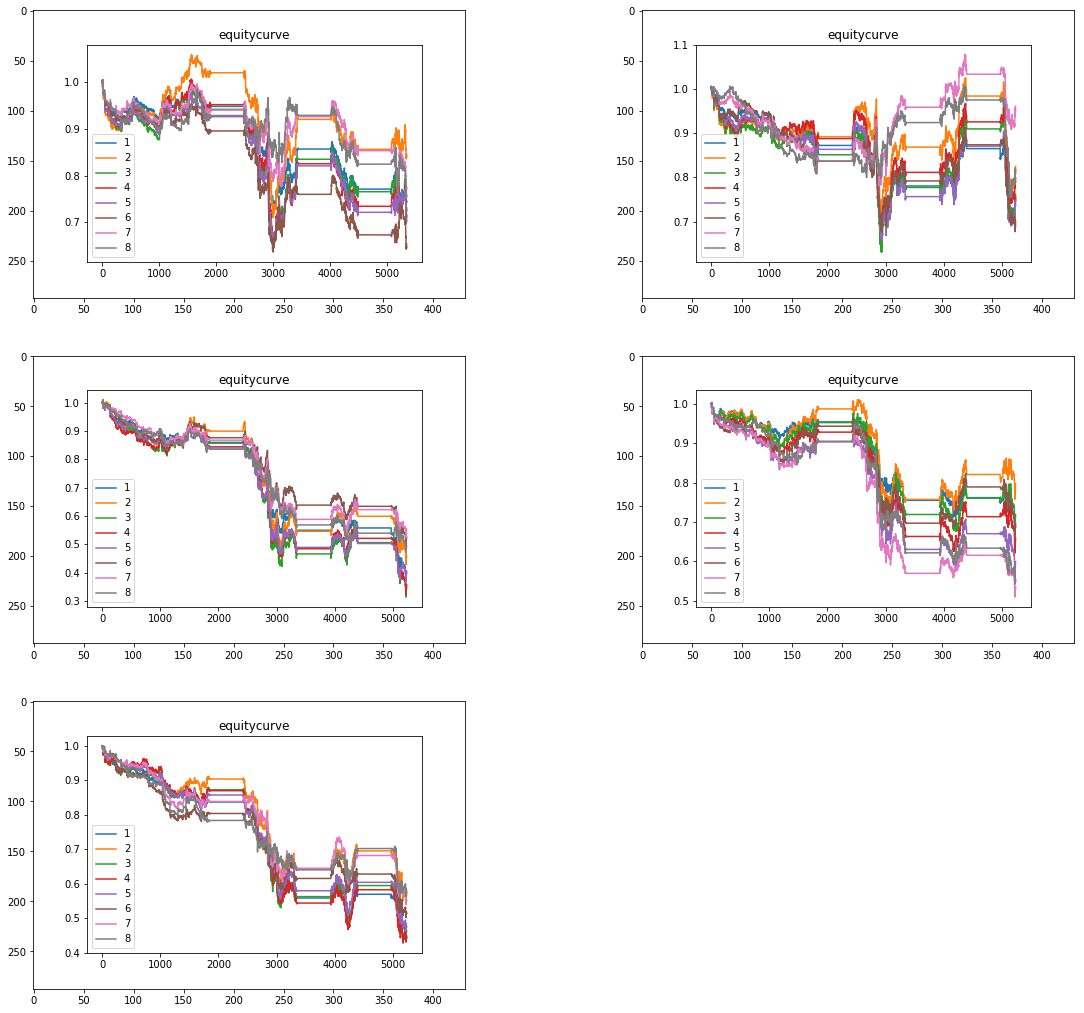

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img0=mpimg.imread('../Validation_OS/performance_zn_5min_1701_0.0.png')
img1=mpimg.imread('../Validation_OS/performance_zn_5min_1701_1.0.png')
img2=mpimg.imread('../Validation_OS/performance_zn_5min_1701_2.0.png')
img3=mpimg.imread('../Validation_OS/performance_zn_5min_1701_3.0.png')
img4=mpimg.imread('../Validation_OS/performance_zn_5min_1701_4.0.png')
fig = plt.figure(figsize=(20,18))
plt.subplot(321)
plt.imshow(img0)
plt.subplot(322)
plt.imshow(img1)
plt.subplot(323)
plt.imshow(img2)
plt.subplot(324)
plt.imshow(img3)
plt.subplot(325)
plt.imshow(img4)
plt.show()

In [30]:
import pandas as pd
perform1 = pd.read_csv(r'../Validation_OS/performance_zn_5min_1701_0.0.csv')
perform2 = pd.read_csv(r'../Validation_OS/performance_zn_5min_1701_1.0.csv')
perform3 = pd.read_csv(r'../Validation_OS/performance_zn_5min_1701_2.0.csv')
perform4 = pd.read_csv(r'../Validation_OS/performance_zn_5min_1701_3.0.csv')
perform5 = pd.read_csv(r'../Validation_OS/performance_zn_5min_1701_4.0.csv')
display(perform1)
display(perform2)
display(perform3)
display(perform4)
display(perform5)

,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.391304,-0.005624,-0.002511,0.001715,-0.000114,-0.041235,0.025331,-0.271265,0.682948,-3.593341,2222,0.746904,0.475248
1,2,0.518087,-0.003417,-0.003617,0.002427,-0.000079,-0.067726,0.038123,-0.328221,0.670947,-1.648795,1956,0.846241,0.496421
2,3,0.503066,-0.005962,-0.003776,0.002186,-0.000149,-0.066501,0.037665,-0.364154,0.578942,-2.963005,1798,0.731694,0.577308
3,4,0.482642,-0.006273,-0.003938,0.002079,-0.000161,-0.064518,0.036231,-0.349395,0.527893,-3.249557,1754,0.717693,0.588940
4,5,0.442811,-0.006471,-0.003354,0.001927,-0.000159,-0.060865,0.032457,-0.352658,0.574514,-3.653582,1834,0.708788,0.561069
5,6,0.437381,-0.007683,-0.003065,0.001961,-0.000210,-0.058306,0.028832,-0.365048,0.639943,-4.391314,1643,0.654278,0.542301
6,7,0.429906,-0.004961,-0.002812,0.001902,-0.000127,-0.047497,0.027025,-0.234570,0.676352,-2.885142,1761,0.776739,0.542873
7,8,0.400629,-0.005324,-0.002471,0.001996,-0.000129,-0.044326,0.030991,-0.248783,0.807912,-3.322101,1852,0.760433,0.494600


,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.526688,-0.005451,-0.002864,0.001722,-0.000114,-0.047241,0.021320,-0.304010,0.601210,-2.587552,2145,0.754690,0.517483
1,2,0.690739,-0.003894,-0.004127,0.002392,-0.000090,-0.069581,0.028031,-0.289887,0.579466,-1.409444,1942,0.824760,0.538105
2,3,0.708338,-0.005302,-0.004396,0.002230,-0.000133,-0.069568,0.030528,-0.369541,0.507370,-1.871401,1792,0.761395,0.622210
3,4,0.664235,-0.004463,-0.004573,0.002108,-0.000114,-0.068139,0.025925,-0.324781,0.460929,-1.679672,1760,0.799175,0.638636
4,5,0.643007,-0.005615,-0.003902,0.001989,-0.000140,-0.066907,0.022399,-0.340066,0.509763,-2.182928,1808,0.747345,0.608960
5,6,0.546674,-0.006639,-0.003526,0.002047,-0.000183,-0.062360,0.027672,-0.323800,0.580556,-3.036088,1636,0.701245,0.582518
6,7,0.425778,-0.000871,-0.003052,0.002126,-0.000024,-0.053859,0.022204,-0.222081,0.696812,-0.511339,1638,0.960811,0.563492
7,8,0.570065,-0.004044,-0.002786,0.002147,-0.000107,-0.071761,0.023904,-0.250088,0.770682,-1.773616,1707,0.818006,0.521968


,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.426801,-0.013216,-0.002810,0.001585,-0.000280,-0.041641,0.016671,-0.623191,0.564086,-7.741542,2127,0.405263,0.482840
1,2,0.577087,-0.011896,-0.004093,0.002324,-0.000284,-0.067970,0.024111,-0.576946,0.567898,-5.153317,1886,0.464696,0.505302
2,3,0.606118,-0.014370,-0.004276,0.002104,-0.000370,-0.067362,0.026042,-0.688557,0.491944,-5.927214,1749,0.353334,0.583190
3,4,0.578705,-0.014236,-0.004506,0.002052,-0.000378,-0.066902,0.023741,-0.679823,0.455383,-6.149797,1696,0.359395,0.596698
4,5,0.505373,-0.013323,-0.003909,0.001910,-0.000341,-0.065631,0.020577,-0.635796,0.488686,-6.590648,1756,0.400467,0.571754
5,6,0.433445,-0.010527,-0.003566,0.002052,-0.000293,-0.062251,0.024430,-0.502964,0.575406,-6.071884,1617,0.526271,0.554731
6,7,0.411473,-0.009859,-0.003152,0.001982,-0.000264,-0.060547,0.023915,-0.478154,0.628752,-5.990321,1683,0.556327,0.534165
7,8,0.396455,-0.011219,-0.002872,0.002082,-0.000305,-0.061177,0.022677,-0.530500,0.724952,-7.074614,1657,0.495142,0.488835


,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.321585,-0.006743,-0.002602,0.001677,-0.000141,-0.039204,0.021624,-0.330078,0.644497,-5.242219,2149,0.696553,0.489065
1,2,0.453993,-0.004521,-0.003731,0.002351,-0.000106,-0.064270,0.021610,-0.287270,0.630188,-2.489513,1923,0.796560,0.511180
2,3,0.472282,-0.006244,-0.003860,0.002146,-0.000156,-0.063998,0.023502,-0.325612,0.555955,-3.305409,1796,0.719004,0.589087
3,4,0.467684,-0.007548,-0.004055,0.002015,-0.000195,-0.064377,0.018794,-0.379743,0.496884,-4.034908,1746,0.660329,0.599656
4,5,0.438131,-0.008901,-0.003487,0.001890,-0.000223,-0.063036,0.017120,-0.440521,0.542113,-5.079142,1796,0.599441,0.570156
5,6,0.449824,-0.006845,-0.003157,0.001975,-0.000185,-0.059473,0.026647,-0.339795,0.625742,-3.803999,1667,0.691996,0.555489
6,7,0.441427,-0.010311,-0.002935,0.001836,-0.000270,-0.062693,0.016388,-0.490860,0.625824,-5.839696,1720,0.535996,0.533140
7,8,0.381667,-0.009896,-0.002798,0.001972,-0.000260,-0.060808,0.032807,-0.459342,0.704712,-6.481954,1712,0.554689,0.504673


,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.366628,-0.011948,-0.002674,0.001594,-0.000258,-0.032473,0.021296,-0.545943,0.595960,-8.147136,2084,0.462346,0.479846
1,2,0.482270,-0.009549,-0.003785,0.002301,-0.000228,-0.051475,0.028000,-0.449398,0.607907,-4.949982,1887,0.570299,0.500795
2,3,0.506964,-0.012254,-0.003917,0.002137,-0.000317,-0.053025,0.030495,-0.568081,0.545669,-6.042868,1741,0.448567,0.568639
3,4,0.508775,-0.012332,-0.004179,0.002001,-0.000329,-0.054790,0.026659,-0.572535,0.478659,-6.059665,1686,0.445059,0.591340
4,5,0.485338,-0.011608,-0.003471,0.001899,-0.000296,-0.054001,0.026973,-0.538234,0.546916,-5.979460,1766,0.477630,0.555493
5,6,0.433970,-0.010723,-0.003055,0.001952,-0.000297,-0.048764,0.035382,-0.498936,0.639064,-6.177000,1625,0.517486,0.526769
6,7,0.468752,-0.009916,-0.002866,0.001872,-0.000260,-0.052763,0.025759,-0.460839,0.653083,-5.288254,1717,0.553802,0.529994
7,8,0.423800,-0.009319,-0.002605,0.001958,-0.000246,-0.064730,0.031827,-0.438479,0.751533,-5.496999,1706,0.580667,0.495311


## Major contract, OutSample, with fixed trading cost 1.2 bp, optimized sizing with CL

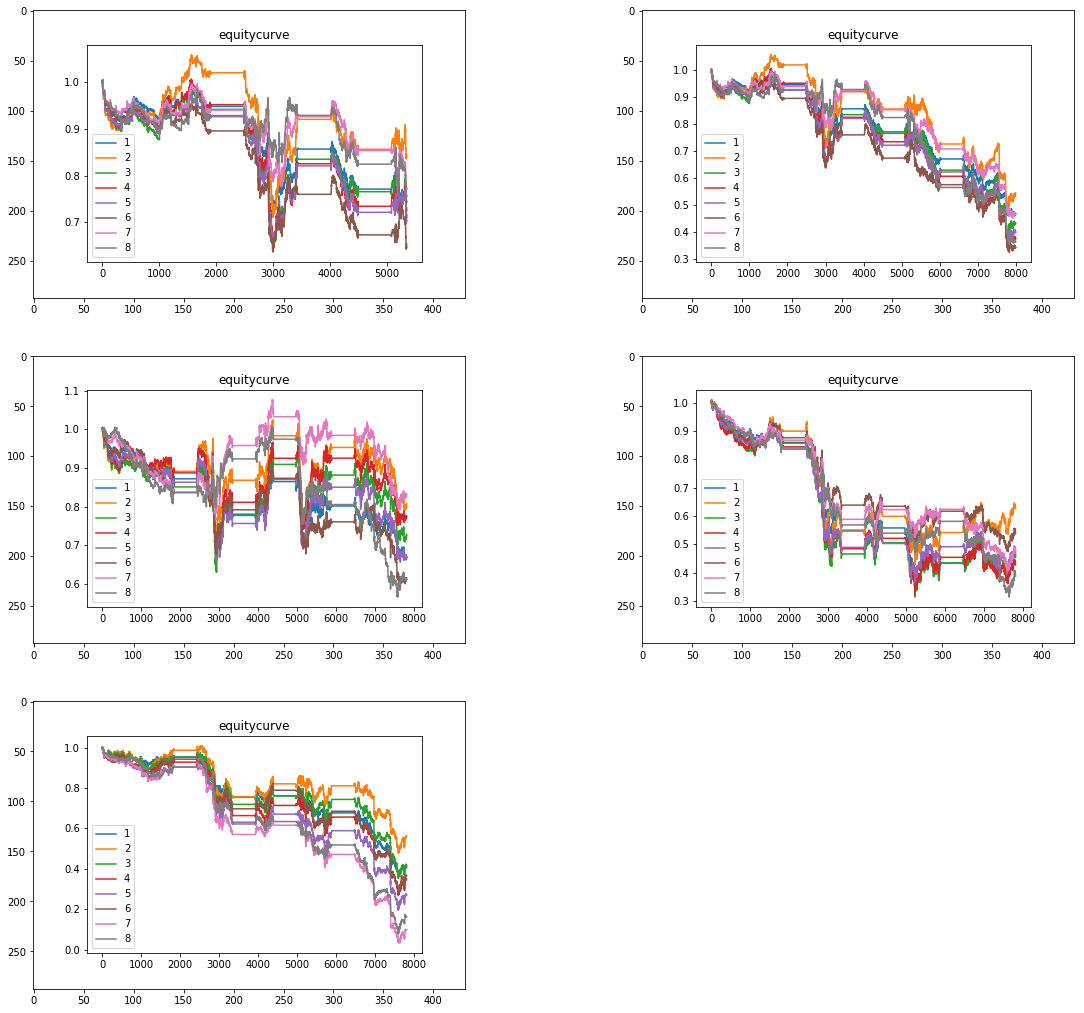

In [16]:
img1=mpimg.imread('../Validation_OS/performance_zn_5min_0.0part.png')
img2=mpimg.imread('../Validation_OS/performance_zn_5min_1.0part.png')
img3=mpimg.imread('../Validation_OS/performance_zn_5min_2.0part.png')
img4=mpimg.imread('../Validation_OS/performance_zn_5min_3.0part.png')
img5=mpimg.imread('../Validation_OS/performance_zn_5min_4.0part.png')
fig = plt.figure(figsize=(20,18))
plt.subplot(321)
plt.imshow(img0)
plt.subplot(322)
plt.imshow(img1)
plt.subplot(323)
plt.imshow(img2)
plt.subplot(324)
plt.imshow(img3)
plt.subplot(325)
plt.imshow(img4)
plt.show()

In [31]:
import pandas as pd
perform1 = pd.read_csv(r'../Validation_OS/performance_zn_5min_0.0part.csv')
perform2 = pd.read_csv(r'../Validation_OS/performance_zn_5min_1.0part.csv')
perform3 = pd.read_csv(r'../Validation_OS/performance_zn_5min_2.0part.csv')
perform4 = pd.read_csv(r'../Validation_OS/performance_zn_5min_3.0part.csv')
perform5 = pd.read_csv(r'../Validation_OS/performance_zn_5min_4.0part.csv')
display(perform1)
display(perform2)
display(perform3)
display(perform4)
display(perform5)

,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.393587,-0.007499,-0.002766,0.001783,-0.000155,-0.074919,0.025331,-0.547779,0.644688,-4.763385,3439,0.467556,0.487351
1,2,0.560557,-0.006438,-0.003984,0.002494,-0.000149,-0.109893,0.038123,-0.545346,0.625963,-2.871375,3075,0.542882,0.506667
2,3,0.539217,-0.008011,-0.004262,0.002262,-0.000201,-0.109703,0.037665,-0.621332,0.530579,-3.714187,2823,0.431218,0.597237
3,4,0.510222,-0.008794,-0.004335,0.002156,-0.000225,-0.102492,0.036231,-0.657720,0.497272,-4.309022,2771,0.375610,0.600866
4,5,0.487984,-0.008463,-0.003776,0.002005,-0.000210,-0.101537,0.032457,-0.634228,0.530895,-4.335919,2868,0.399096,0.579847
5,6,0.429497,-0.009251,-0.003389,0.002024,-0.000251,-0.081283,0.028832,-0.676063,0.597124,-5.384882,2619,0.343167,0.558992
6,7,0.415511,-0.007505,-0.003066,0.001938,-0.000192,-0.071099,0.027025,-0.549602,0.632050,-4.515672,2776,0.467127,0.552954
7,8,0.417232,-0.008976,-0.002791,0.002043,-0.000225,-0.063353,0.030991,-0.646904,0.731843,-5.378561,2836,0.362674,0.506700


,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.459306,-0.004651,-0.002989,0.001814,-0.000100,-0.047241,0.024693,-0.341324,0.606819,-2.531694,3296,0.669759,0.529733
1,2,0.620372,-0.002718,-0.004255,0.002503,-0.000064,-0.069581,0.030842,-0.289887,0.588128,-1.095458,3029,0.806996,0.549356
2,3,0.641552,-0.003847,-0.004593,0.002347,-0.000097,-0.069568,0.030528,-0.369541,0.510991,-1.499282,2810,0.726830,0.632028
3,4,0.599261,-0.003176,-0.004613,0.002230,-0.000081,-0.068139,0.028453,-0.324781,0.483463,-1.325060,2770,0.774488,0.641516
4,5,0.581561,-0.004656,-0.004033,0.002106,-0.000117,-0.066907,0.028960,-0.343530,0.522184,-2.001552,2825,0.669417,0.614867
5,6,0.489137,-0.005412,-0.003736,0.002164,-0.000150,-0.062360,0.036677,-0.412085,0.579378,-2.766322,2565,0.615717,0.594932
6,7,0.400833,-0.002371,-0.003306,0.002130,-0.000065,-0.053859,0.029532,-0.265903,0.644282,-1.479075,2585,0.831627,0.580658
7,8,0.509438,-0.005461,-0.003023,0.002191,-0.000147,-0.071761,0.035562,-0.437864,0.724707,-2.679749,2639,0.612293,0.535809


,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.408803,-0.007583,-0.002939,0.001739,-0.000162,-0.041641,0.028751,-0.623191,0.591690,-4.637324,3325,0.461606,0.514286
1,2,0.553144,-0.005263,-0.004222,0.002482,-0.000124,-0.067970,0.035906,-0.576946,0.587929,-2.378501,3024,0.626355,0.534061
2,3,0.576417,-0.007688,-0.004519,0.002290,-0.000196,-0.067362,0.033137,-0.688557,0.506829,-3.334263,2791,0.454174,0.614475
3,4,0.538750,-0.008059,-0.004616,0.002193,-0.000210,-0.066902,0.033126,-0.679823,0.475003,-3.739903,2730,0.427776,0.622344
4,5,0.492419,-0.007381,-0.004039,0.002063,-0.000187,-0.065631,0.033716,-0.635796,0.510844,-3.747151,2800,0.475972,0.601429
5,6,0.425335,-0.006508,-0.003752,0.002170,-0.000181,-0.062251,0.024430,-0.527552,0.578425,-3.825311,2555,0.537921,0.583170
6,7,0.403997,-0.007457,-0.003361,0.002096,-0.000201,-0.060547,0.029968,-0.594794,0.623788,-4.614337,2636,0.470574,0.559181
7,8,0.422432,-0.008616,-0.003040,0.002142,-0.000230,-0.061177,0.022677,-0.687206,0.704635,-5.098840,2656,0.388289,0.520331


,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.365660,-0.008373,-0.002864,0.001725,-0.000179,-0.057519,0.021624,-0.638526,0.602496,-5.724849,3316,0.405489,0.505730
1,2,0.515328,-0.006222,-0.004033,0.002415,-0.000146,-0.084747,0.021610,-0.527584,0.598903,-3.018442,3023,0.558241,0.524975
2,3,0.523386,-0.008267,-0.004275,0.002218,-0.000209,-0.085626,0.023502,-0.646850,0.518987,-3.948958,2803,0.413021,0.604709
3,4,0.509371,-0.009171,-0.004376,0.002103,-0.000238,-0.081401,0.018794,-0.730918,0.480670,-4.501221,2735,0.348847,0.610969
4,5,0.506011,-0.010279,-0.003913,0.001983,-0.000262,-0.081775,0.018591,-0.805864,0.506689,-5.078619,2784,0.270166,0.589440
5,6,0.519146,-0.008897,-0.003663,0.002062,-0.000246,-0.079765,0.026647,-0.714408,0.563033,-4.284566,2564,0.368294,0.578783
6,7,0.513741,-0.012721,-0.003313,0.001901,-0.000338,-0.067193,0.016388,-0.968240,0.573997,-6.190343,2670,0.096815,0.550936
7,8,0.484098,-0.011786,-0.003066,0.002009,-0.000310,-0.060808,0.032807,-0.923189,0.655375,-6.086495,2700,0.163206,0.523333


,Model Order,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,1,0.430374,-0.008805,-0.002853,0.001739,-0.000191,-0.047267,0.021296,-0.648619,0.609656,-5.114923,3272,0.374823,0.502751
1,2,0.568596,-0.005461,-0.004064,0.002485,-0.000129,-0.069786,0.028000,-0.449398,0.611518,-2.401148,3003,0.612260,0.525808
2,3,0.597860,-0.008054,-0.004267,0.002319,-0.000206,-0.071659,0.030495,-0.599976,0.543474,-3.368025,2775,0.428136,0.596757
3,4,0.603268,-0.007930,-0.004444,0.002199,-0.000209,-0.070007,0.026659,-0.586337,0.494743,-3.286430,2698,0.436942,0.613788
4,5,0.579326,-0.008121,-0.003810,0.002079,-0.000206,-0.071017,0.026973,-0.599963,0.545743,-3.504312,2796,0.423440,0.583691
5,6,0.505841,-0.008166,-0.003447,0.002115,-0.000226,-0.066067,0.035382,-0.601354,0.613600,-4.036000,2566,0.420193,0.561964
6,7,0.521822,-0.007678,-0.003159,0.002033,-0.000205,-0.066136,0.025759,-0.586534,0.643444,-3.678347,2659,0.454878,0.554344
7,8,0.454615,-0.007636,-0.002972,0.002107,-0.000203,-0.064730,0.031827,-0.566741,0.708838,-4.199197,2677,0.457839,0.527830
